# Clustering analysis on 10k PBMC data

In [1]:
from keras.utils.vis_utils import model_to_dot
from keras.utils import normalize, to_categorical
from IPython.display import SVG

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os

from imp import load_source
from models import *

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

## Adversarial Autoencoder: Basic Architecture

<img src="img/adversarial_autoencoder_model.png" width="800px" style="float:center" >

### Build the model

In [4]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'layers_dis_dim': [200, 100, 50, 30],
    'batch_size': 35,
    'epochs': 200,
}

In [5]:
model = AAE1(**parameters)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Gene expression data rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value                               Description
batch_size                      35                                batch size
epochs                         200                          number of epochs
alpha                          0.1       alpha coeff. in activation function
do_rate                        0.1                              dropout rate
kernel_initializer  glorot_uniform    kernel initializer of all dense layers
bias_initializer             zeros      bias initializer of all dense layers
l2_weight                     0.01        weight of l2 kernel regularization
l1_weight                     0.01      weight of l1 activity regularization
latent_dim                      10               dimension of latent space Z
layer_1_enc_dim                200        dimension of encoder dense layer 1
layer_2_enc_dim                100        dimension of encoder dense layer 2
layer_3_enc_dim                 50        dimension of encoder dense layer 3
layer_4_enc_dim                 30        dimension of encoder dense layer 4
layer_1_dec_dim                 30        dimension of decoder dense layer 1
layer_2_dec_dim                 50        dimension of decoder dense layer 2
layer_3_dec_dim                100        dimension of decoder dense layer 3
layer_4_dec_dim                200        dimension of decoder dense layer 4
lr_ae                       0.0002              learning rate of autoencoder
dr_ae                        1e-06                 decay rate of autoencoder
layer_1_dis_dim                200  dimension of discriminator dense layer 1
layer_2_dis_dim                100  dimension of discriminator dense layer 2
layer_3_dis_dim                 50  dimension of discriminator dense layer 3
layer_4_dis_dim                 30  dimension of discriminator dense layer 4
lr_dis                      0.0001            learning rate of discriminator
dr_dis                       1e-06               decay rate of discriminator
lr_gen                      0.0001                learning rate of generator
dr_gen                       1e-06                   decay rate of generator

In [9]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          358000      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
____________________________________________________________________________________________

In [11]:
# Export model graphs

os.makedirs('../graphs/AAE1/PBMC10k', exist_ok=True)
model.export_graph('../graphs/AAE1/PBMC10k')

Model graphs saved.



### Visualize graphs


ENCODER


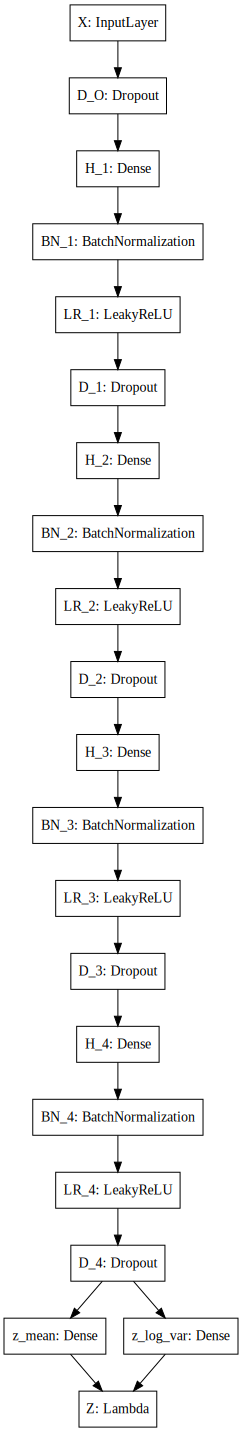

In [12]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


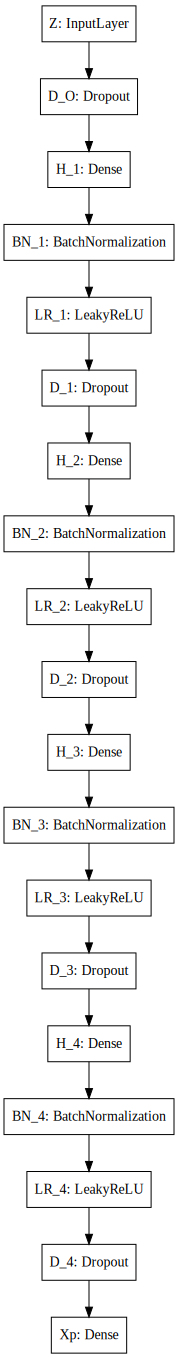

In [13]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


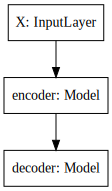

In [14]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


GENERATOR


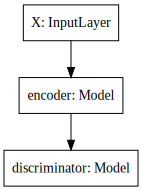

In [15]:
print("\nGENERATOR")
print("=========")
SVG(model_to_dot(model.generator).create(prog='dot', format='svg'))


DISCRIMINATOR


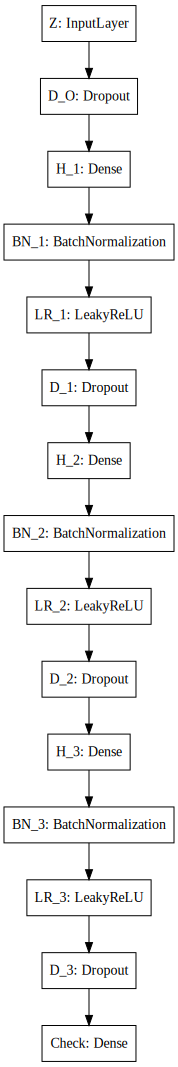

In [16]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))

### Train the model

Epoch 200/200, reconstruction loss: 0.919037, generation loss: 1.332633, discriminator loss: 0.187883


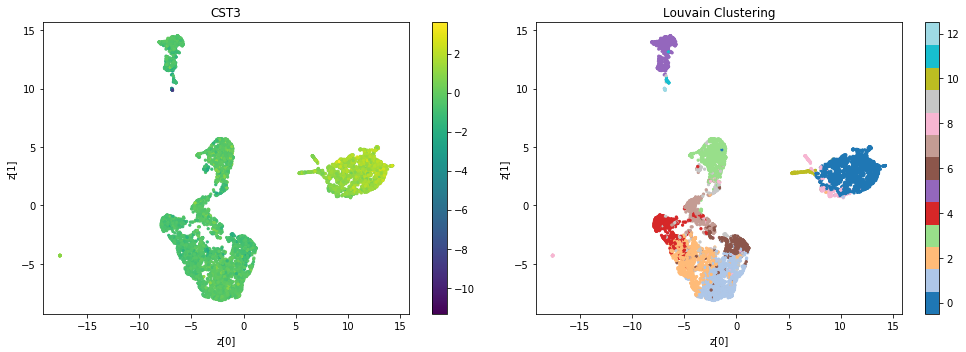

Training completed.


In [12]:
# graph=True to show the data points in the 2-D latent space

GENE = 'CST3' # used only for training visualization 

rec_loss, gen_loss, dis_loss = model.train(graph=True, gene=GENE)

In [13]:
# save models in h5 format
os.makedirs('../models/AAE1/PBMC10k', exist_ok=True)
model.export_model('../models/AAE1/PBMC10k')

All networks exported in h5 format.


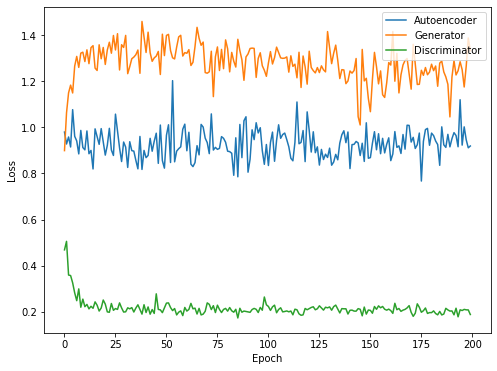

In [14]:
# Plot training loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss)
plt.plot(gen_loss)
plt.plot(dis_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Generator', 'Discriminator'], loc='upper right')
plt.show()

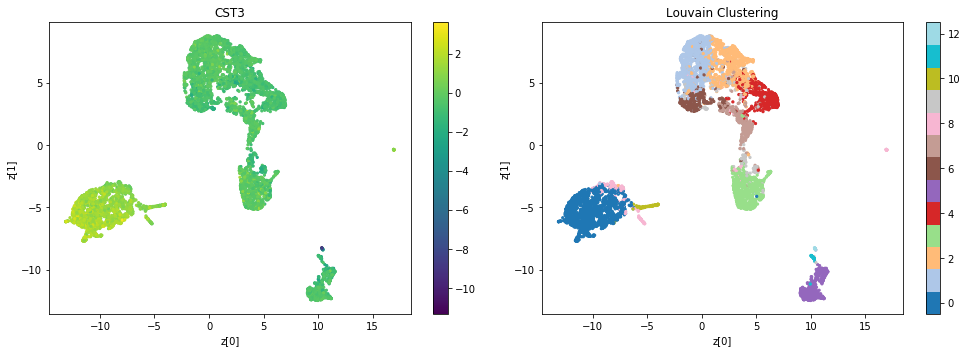

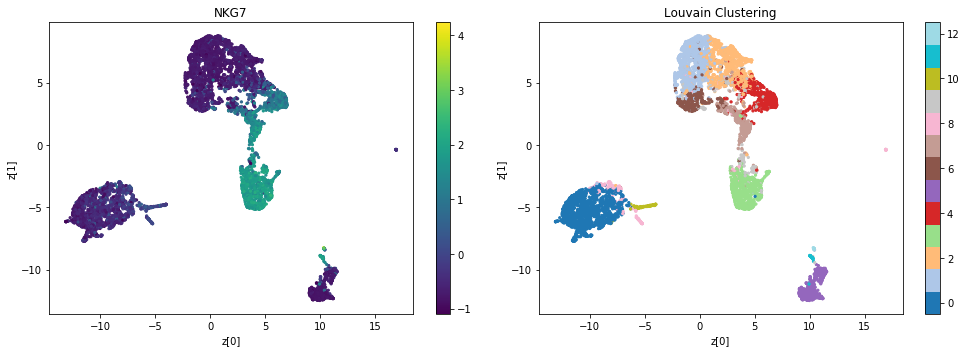

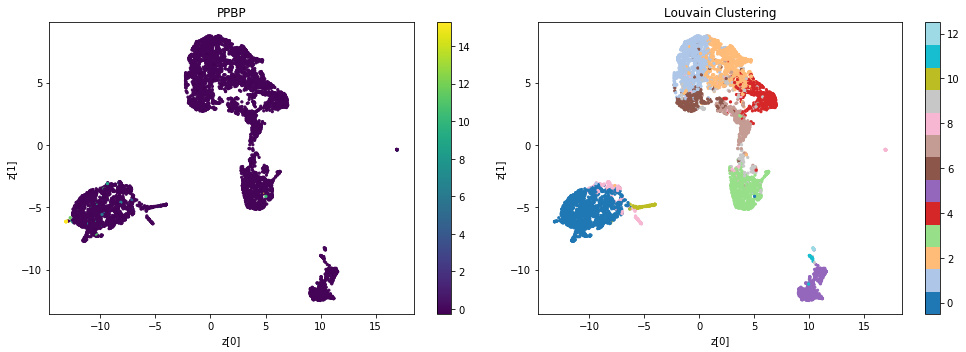

In [15]:
GENE_LIST = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

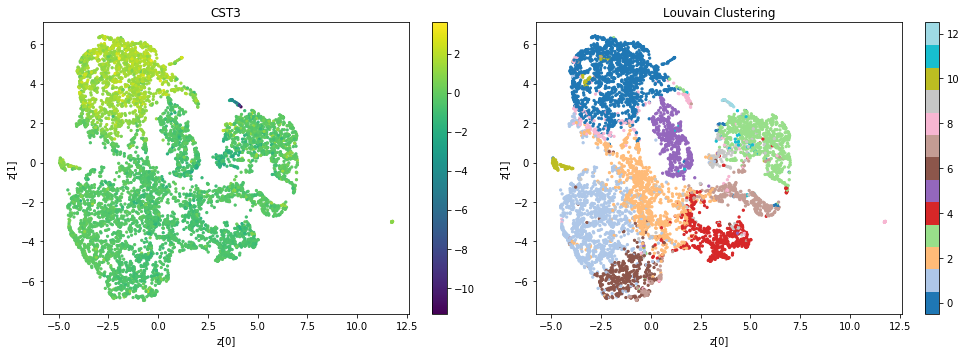

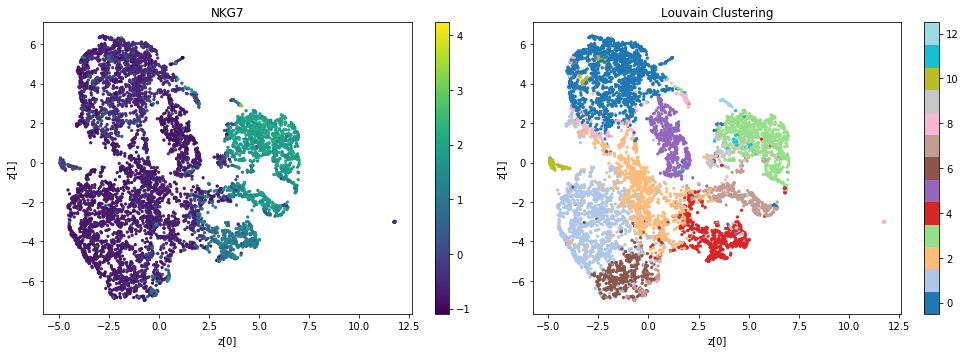

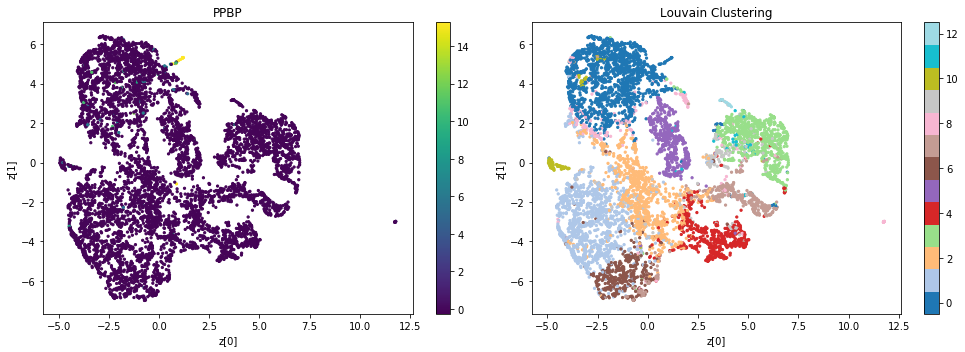

In [16]:
# WITHOUT BATCH NORMALIZATION IN DECODER AND DISCRIMINATOR 

## Incorporating Label Information in the Adversarial Regularization

### Build the model

In [4]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'layers_dis_dim': [200, 100, 50],
    'batch_size': 35,
    'epochs': 200,
}

In [5]:
model = AAE2(**parameters)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Gene expression data rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value                               Description
batch_size                      35                                batch size
epochs                         200                          number of epochs
alpha                          0.1       alpha coeff. in activation function
do_rate                        0.1                              dropout rate
kernel_initializer  glorot_uniform    kernel initializer of all dense layers
bias_initializer             zeros      bias initializer of all dense layers
l2_weight                     0.01        weight of l2 kernel regularization
l1_weight                     0.01      weight of l1 activity regularization
latent_dim                      10               dimension of latent space Z
layer_1_enc_dim                200        dimension of encoder dense layer 1
layer_2_enc_dim                100        dimension of encoder dense layer 2
layer_3_enc_dim                 50        dimension of encoder dense layer 3
layer_4_enc_dim                 30        dimension of encoder dense layer 4
layer_1_dec_dim                 30        dimension of decoder dense layer 1
layer_2_dec_dim                 50        dimension of decoder dense layer 2
layer_3_dec_dim                100        dimension of decoder dense layer 3
layer_4_dec_dim                200        dimension of decoder dense layer 4
lr_ae                       0.0002              learning rate of autoencoder
dr_ae                        1e-06                 decay rate of autoencoder
layer_1_dis_dim                200  dimension of discriminator dense layer 1
layer_2_dis_dim                100  dimension of discriminator dense layer 2
layer_3_dis_dim                 50  dimension of discriminator dense layer 3
lr_dis                      0.0001            learning rate of discriminator
dr_dis                       1e-06               decay rate of discriminator
lr_gen                      0.0001                learning rate of generator
dr_gen                       1e-06                   decay rate of generator

In [9]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          358000      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
____________________________________________________________________________________________

In [11]:
# Export model graphs

os.makedirs('../graphs/AAE2/PBMC10k', exist_ok=True)
model.export_graph('../graphs/AAE2/PBMC10k')

Model graphs saved.



### Visualize graphs


ENCODER


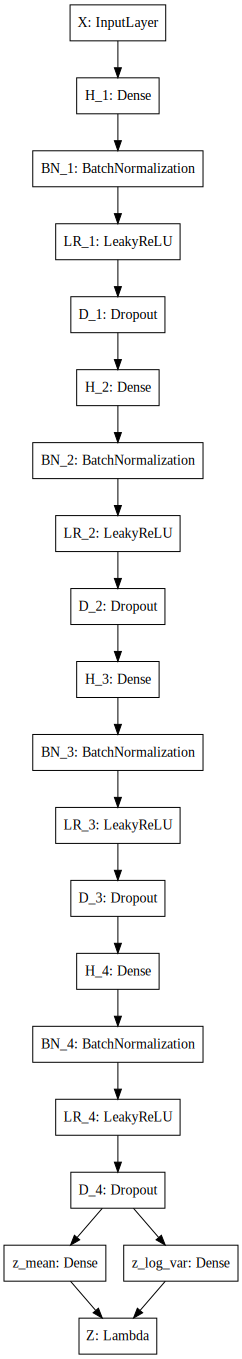

In [12]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


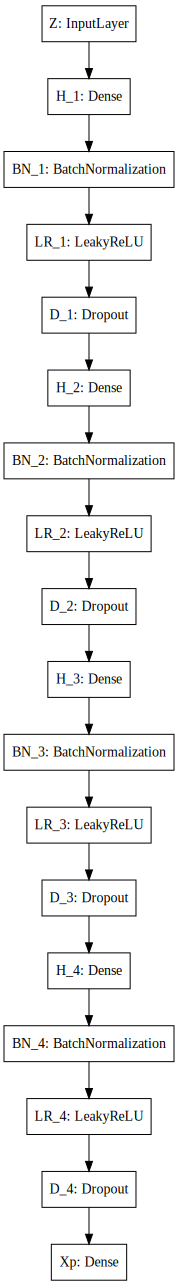

In [13]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


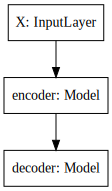

In [14]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


GENERATOR


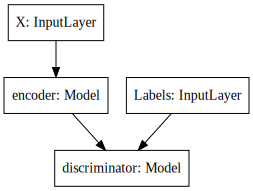

In [15]:
print("\nGENERATOR")
print("=========")
SVG(model_to_dot(model.generator).create(prog='dot', format='svg'))


DISCRIMINATOR


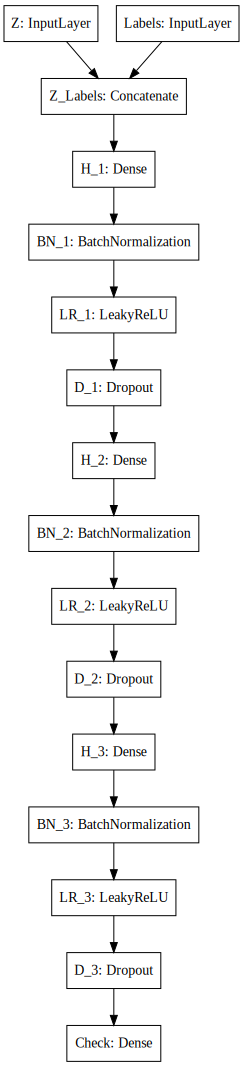

In [16]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))

### Train the model

Epoch 200/200, reconstruction loss: 0.756797, generation loss: 1.163874, discriminator loss: 0.197768


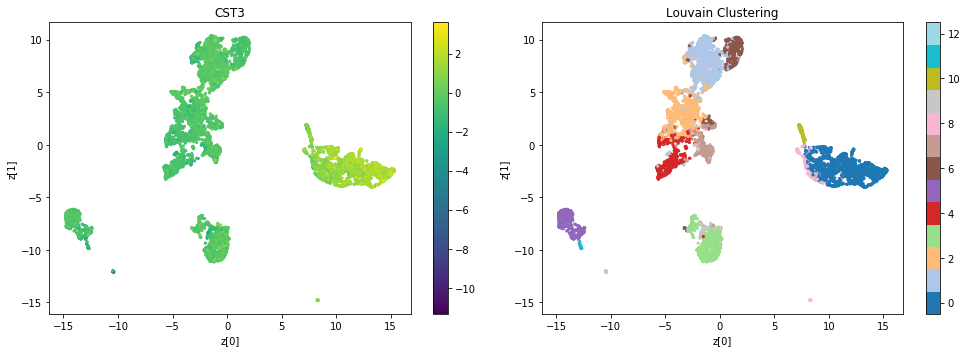

Training completed.


In [17]:
# graph=True to show the data points in the 2-D latent space

GENE = 'CST3' # used only for training visualization 

rec_loss, gen_loss, dis_loss = model.train(graph=True, gene=GENE)

In [21]:
# save models in h5 format
os.makedirs('../models/AAE2/PBMC10k', exist_ok=True)
model.export_model('../models/AAE2/PBMC10k')

All networks exported in h5 format.


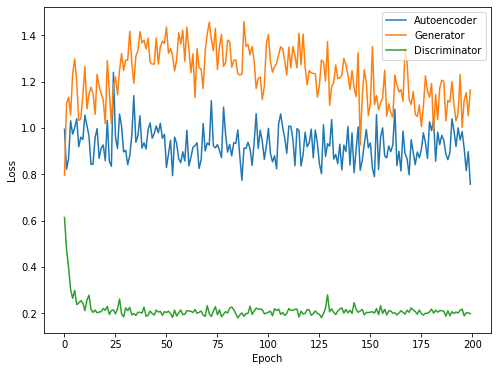

In [22]:
# Plot training & validation loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss)
plt.plot(gen_loss)
plt.plot(dis_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Generator', 'Discriminator'], loc='upper right')
plt.show()

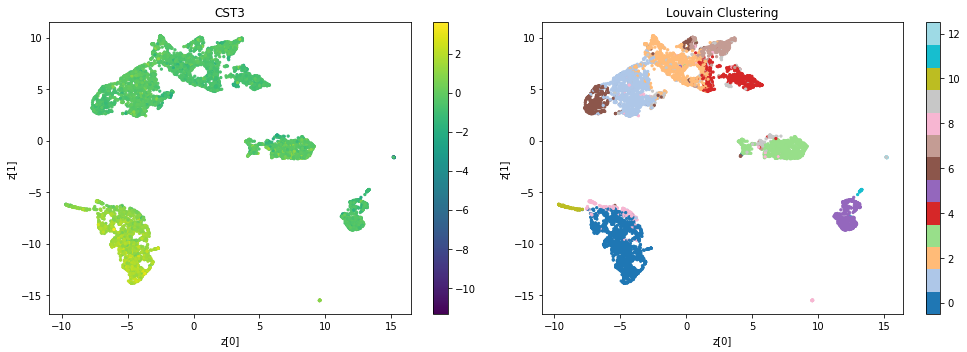

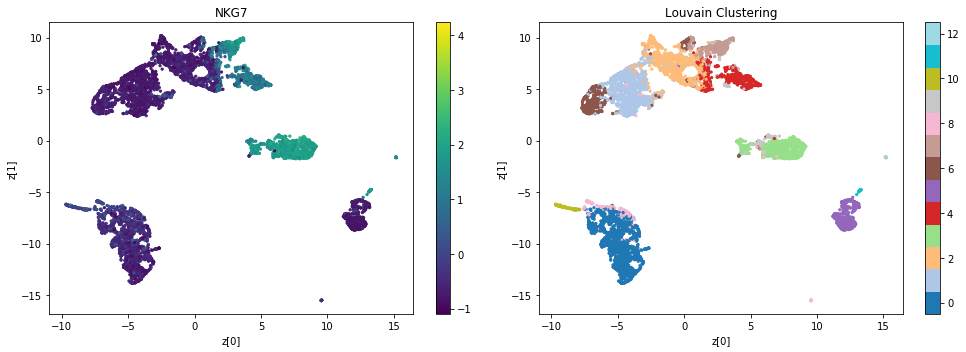

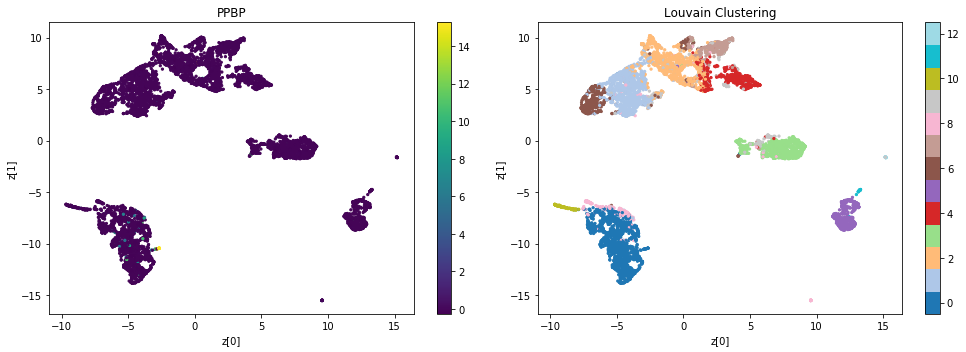

In [23]:
GENE_LIST = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

## Supervised Adversarial Autoencoder

### Build the model

In [4]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'layers_dis_dim': [200, 100, 50],
    'batch_size': 35,
    'epochs': 200,
}

In [5]:
model = AAE3(**parameters)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Gene expression data rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value                               Description
batch_size                      35                                batch size
epochs                         200                          number of epochs
alpha                          0.1       alpha coeff. in activation function
do_rate                        0.1                              dropout rate
kernel_initializer  glorot_uniform    kernel initializer of all dense layers
bias_initializer             zeros      bias initializer of all dense layers
l2_weight                     0.01        weight of l2 kernel regularization
l1_weight                     0.01      weight of l1 activity regularization
latent_dim                      10               dimension of latent space Z
layer_1_enc_dim                200        dimension of encoder dense layer 1
layer_2_enc_dim                100        dimension of encoder dense layer 2
layer_3_enc_dim                 50        dimension of encoder dense layer 3
layer_4_enc_dim                 30        dimension of encoder dense layer 4
layer_1_dec_dim                 30        dimension of decoder dense layer 1
layer_2_dec_dim                 50        dimension of decoder dense layer 2
layer_3_dec_dim                100        dimension of decoder dense layer 3
layer_4_dec_dim                200        dimension of decoder dense layer 4
lr_ae                       0.0002              learning rate of autoencoder
dr_ae                        1e-06                 decay rate of autoencoder
layer_1_dis_dim                200  dimension of discriminator dense layer 1
layer_2_dis_dim                100  dimension of discriminator dense layer 2
layer_3_dis_dim                 50  dimension of discriminator dense layer 3
lr_dis                      0.0001            learning rate of discriminator
dr_dis                       1e-06               decay rate of discriminator
lr_gen                      0.0001                learning rate of generator
dr_gen                       1e-06                   decay rate of generator

In [9]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          358000      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
____________________________________________________________________________________________

Autoencoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 10), (None,  386820      X[0][0]                          
__________________________________________________________________________________________________
Labels (InputLayer)             (None, 13)           0                                            
__________________________________________________________________________________________________
decoder (Model)                 (None, 1789)         388679      encoder[1][2]                    
                                                                 Labels[0][0]            

In [11]:
# Export model graphs

os.makedirs('../graphs/AAE3/PBMC10k', exist_ok=True)
model.export_graph('../graphs/AAE3/PBMC10k')

Model graphs saved.



### Visualize graphs


ENCODER


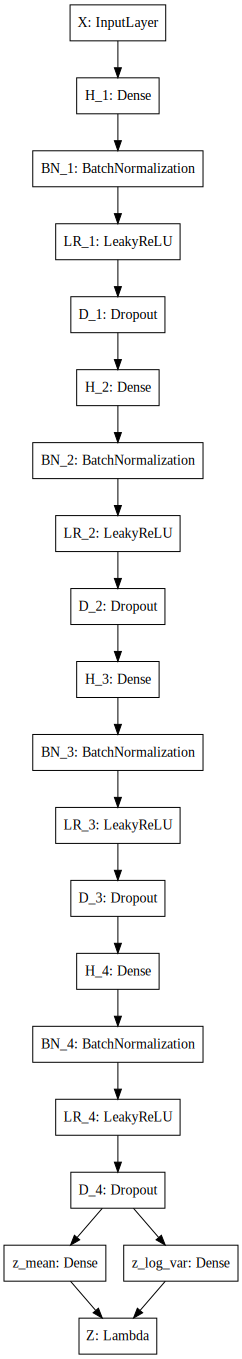

In [12]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


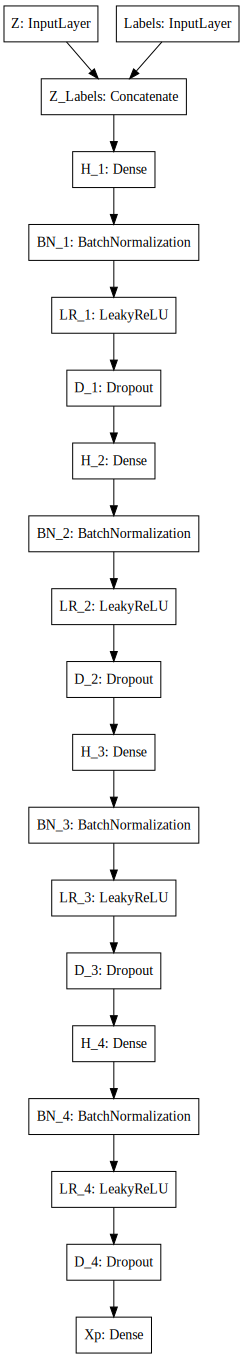

In [13]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


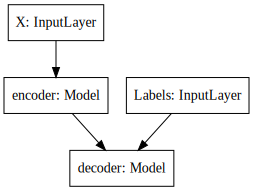

In [14]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


GENERATOR


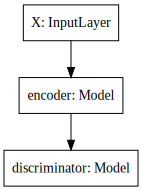

In [15]:
print("\nGENERATOR")
print("=========")
SVG(model_to_dot(model.generator).create(prog='dot', format='svg'))


DISCRIMINATOR


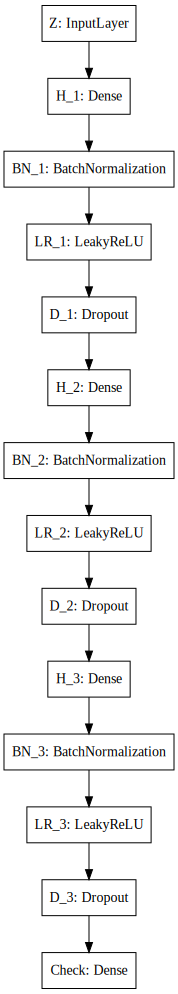

In [16]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))

### Train the model

Epoch 200/200, reconstruction loss: 0.911538, generation loss: 0.842915, discriminator loss: 0.195404


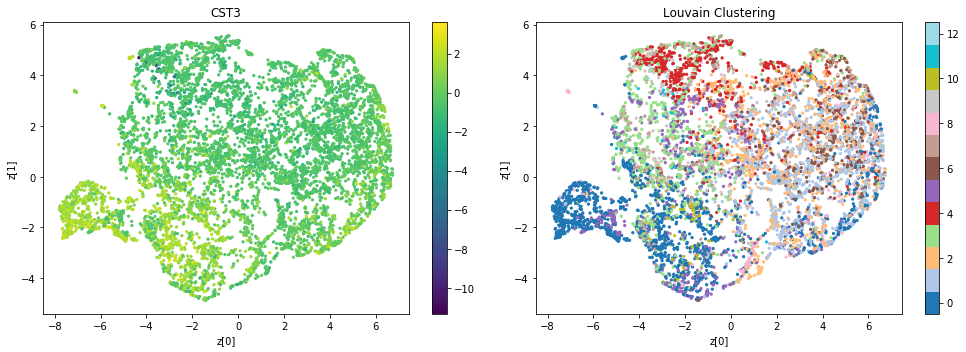

Training completed.


In [17]:
# graph=True to show the data points in the 2-D latent space

GENE = 'CST3' # used only for training visualization 

rec_loss, gen_loss, dis_loss = model.train(graph=True, gene=GENE)

In [21]:
# save models in h5 format
os.makedirs('../models/AAE3/PBMC10k', exist_ok=True)
model.export_model('../models/AAE3/PBMC10k')

All networks exported in h5 format.


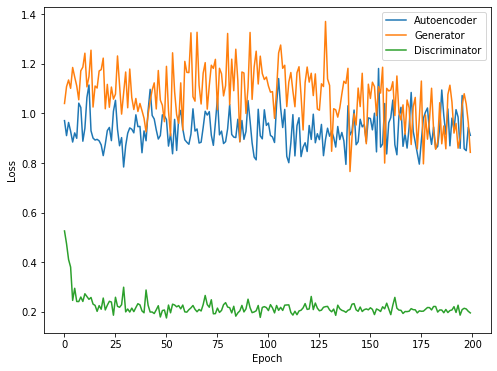

In [22]:
# Plot training & validation loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss)
plt.plot(gen_loss)
plt.plot(dis_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Generator', 'Discriminator'], loc='upper right')
plt.show()

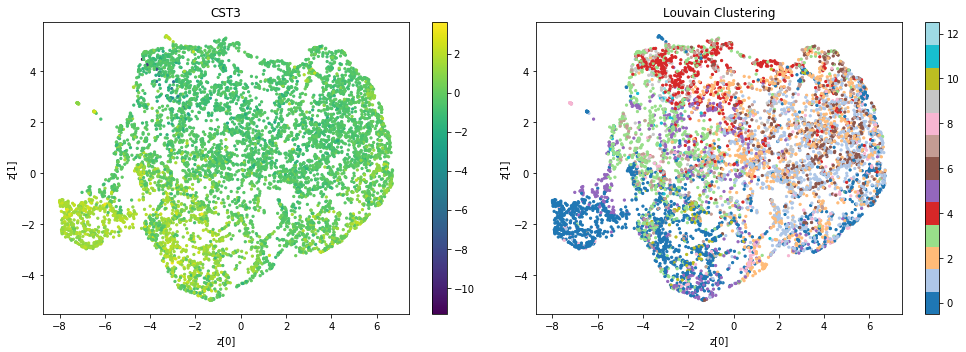

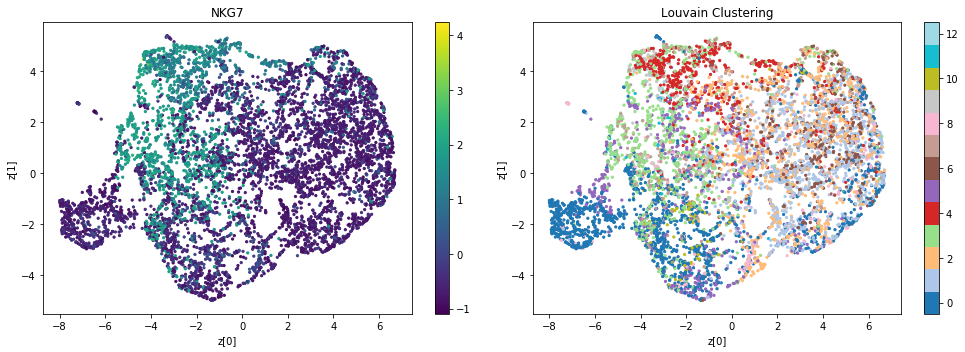

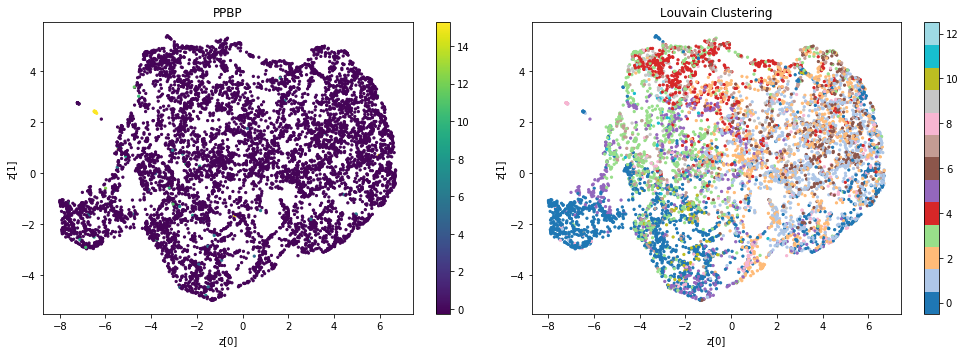

In [23]:
GENE_LIST = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

## Semi-supervised Adversarial Autoencoder

### Build the model

In [4]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'layers_dis_dim': [200, 100, 50, 30],
    'layers_dis_cat_dim': [200, 100, 50, 30],
    'batch_size': 35,
    'epochs': 200,
    'tau': 0.05 # temperature parameter
}

In [5]:
model = AAE4(**parameters)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Gene expression data rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value  \
batch_size                       35   
epochs                          200   
alpha                           0.1   
do_rate                         0.1   
kernel_initializer   glorot_uniform   
bias_initializer              zeros   
l2_weight                      0.01   
l1_weight                      0.01   
latent_dim                       10   
layer_1_enc_dim                 200   
layer_2_enc_dim                 100   
layer_3_enc_dim                  50   
layer_4_enc_dim                  30   
layer_1_dec_dim                  30   
layer_2_dec_dim                  50   
layer_3_dec_dim                 100   
layer_4_dec_dim                 200   
lr_ae                        0.0002   
dr_ae                         1e-06   
layer_1_dis_dim                 200   
layer_2_dis_dim                 100   
layer_3_dis_dim                  50   
layer_4_dis_dim                  30   
lr_dis                       0.0001   
dr_dis                        1e-06   
lr_gen                       0.0001   
dr_gen                        1e-06   
layer_1_dis_cat_dim           200.0   
layer_2_dis_cat_dim           100.0   
layer_3_dis_cat_dim            50.0   
layer_4_dis_cat_dim            30.0   
lr_dis_cat                   0.0001   
dr_dis_cat                    1e-06   
tau                            0.05   

                                                       Description  
batch_size                                              batch size  
epochs                                            number of epochs  
alpha                          alpha coeff. in activation function  
do_rate                                               dropout rate  
kernel_initializer          kernel initializer of all dense layers  
bias_initializer              bias initializer of all dense layers  
l2_weight                       weight of l2 kernel regularization  
l1_weight                     weight of l1 activity regularization  
latent_dim                             dimension of latent space Z  
layer_1_enc_dim                 dimension of encoder dense layer 1  
layer_2_enc_dim                 dimension of encoder dense layer 2  
layer_3_enc_dim                 dimension of encoder dense layer 3  
layer_4_enc_dim                 dimension of encoder dense layer 4  
layer_1_dec_dim                 dimension of decoder dense layer 1  
layer_2_dec_dim                 dimension of decoder dense layer 2  
layer_3_dec_dim                 dimension of decoder dense layer 3  
layer_4_dec_dim                 dimension of decoder dense layer 4  
lr_ae                                 learning rate of autoencoder  
dr_ae                                    decay rate of autoencoder  
layer_1_dis_dim           dimension of discriminator dense layer 1  
layer_2_dis_dim           dimension of discriminator dense layer 2  
layer_3_dis_dim           dimension of discriminator dense layer 3  
layer_4_dis_dim           dimension of discriminator dense layer 4  
lr_dis                              learning rate of discriminator  
dr_dis                                 decay rate of discriminator  
lr_gen                                  learning rate of generator  
dr_gen                                     decay rate of generator  
layer_1_dis_cat_dim  dimension of cat. discriminator dense layer 1  
layer_2_dis_cat_dim  dimension of cat. discriminator dense layer 2  
layer_3_dis_cat_dim  dimension of cat. discriminator dense layer 3  
layer_4_dis_cat_dim  dimension of cat. discriminator dense layer 4  
lr_dis_cat                     learning rate of cat. discriminator  
dr_dis_cat                        decay rate of cat. discriminator  
tau                                          temperature parameter

In [9]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          358000      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
____________________________________________________________________________________________

__________________________________________________________________________________________________
decoder (Model)                 (None, 1789)         388679      encoder[2][2]                    
                                                                 encoder[2][3]                    
Total params: 775,902
Trainable params: 774,382
Non-trainable params: 1,520
__________________________________________________________________________________________________

Generator Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 10), (None,  387223      X[0][0]                          
______________

In [11]:
# Export model graphs

os.makedirs('../graphs/AAE4/PBMC10k', exist_ok=True)
model.export_graph('../graphs/AAE4/PBMC10k')

Model graphs saved.



### Visualize graphs


ENCODER


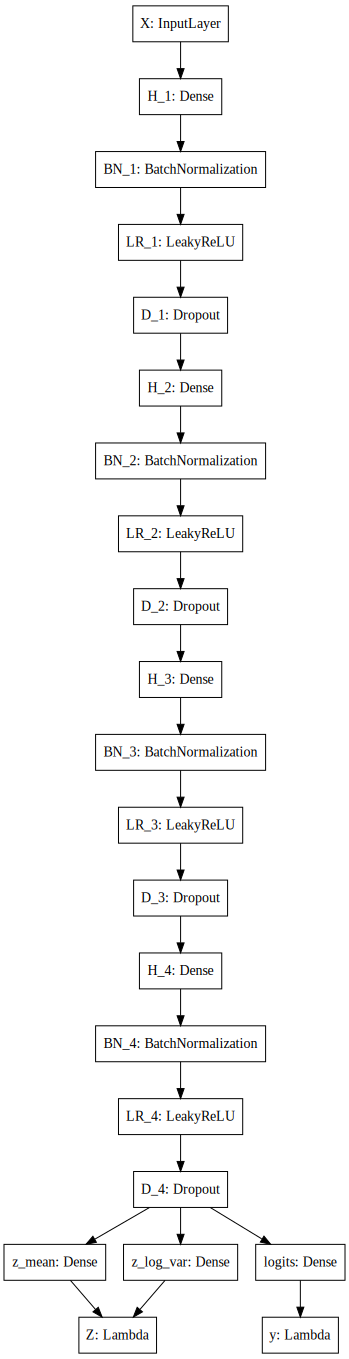

In [12]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


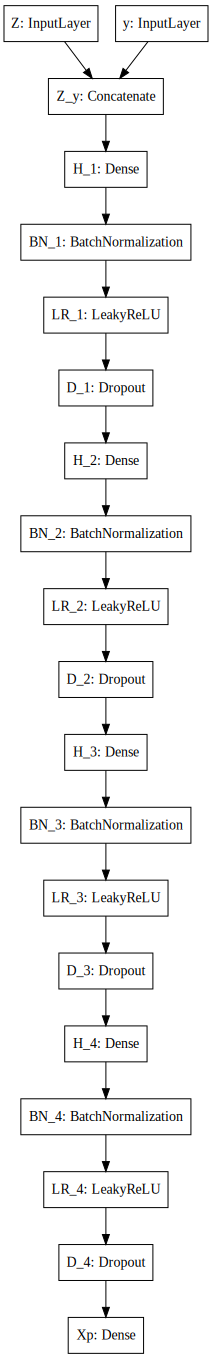

In [13]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


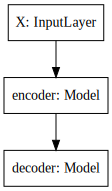

In [14]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


GENERATOR


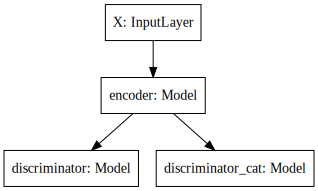

In [15]:
print("\nGENERATOR")
print("=========")
SVG(model_to_dot(model.generator).create(prog='dot', format='svg'))


DISCRIMINATOR


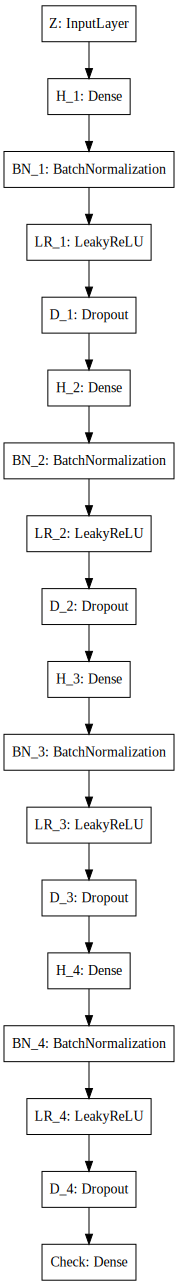

In [16]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))


CATEGORICAL DISCRIMINATOR


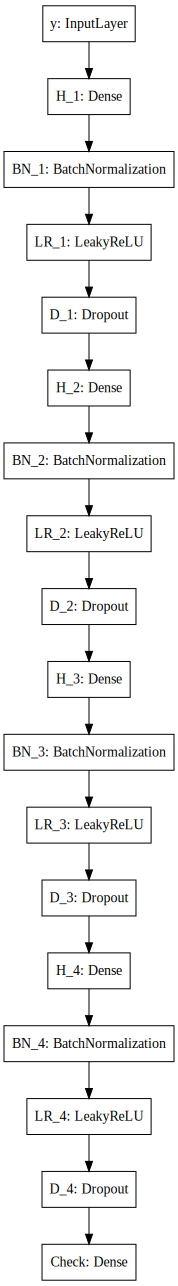

In [17]:
print("\nCATEGORICAL DISCRIMINATOR")
print("=========================")
SVG(model_to_dot(model.discriminator_cat).create(prog='dot', format='svg'))

### Train the model

Epoch 200/200, reconstruction loss: 0.901277, generation loss: 1.818518, discriminator loss: 0.205575, cat. discriminator loss: 0.520001


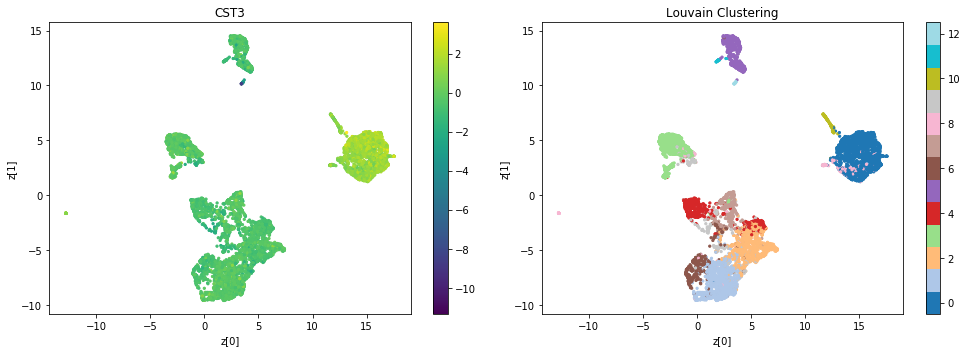

Training completed.


In [18]:
# graph=True to show the data points in the 2-D latent space

GENE = 'CST3' # used only for training visualization 

rec_loss, gen_loss, dis_loss, dis_cat_loss = model.train(graph=True, gene=GENE)

In [19]:
# save models in h5 format
os.makedirs('../models/AAE4/PBMC10k', exist_ok=True)
model.export_model('../models/AAE4/PBMC10k')

All networks exported in h5 format.


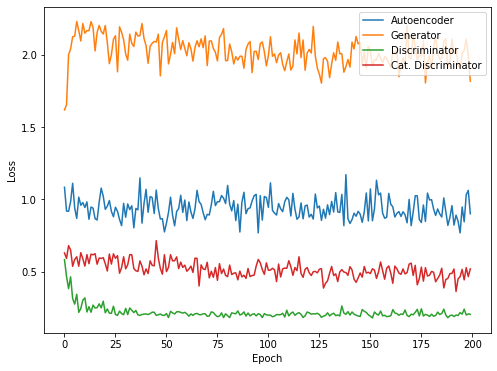

In [20]:
# Plot training loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss)
plt.plot(gen_loss)
plt.plot(dis_loss)
plt.plot(dis_cat_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Generator', 'Discriminator', 'Cat. Discriminator'], 
           loc='upper right')
plt.show()

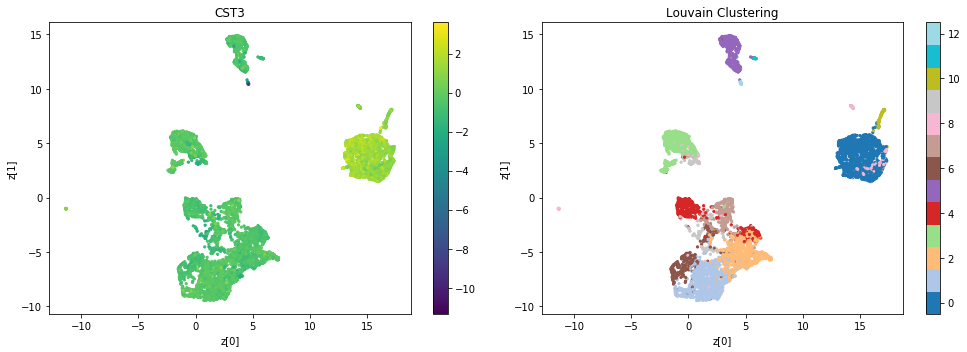

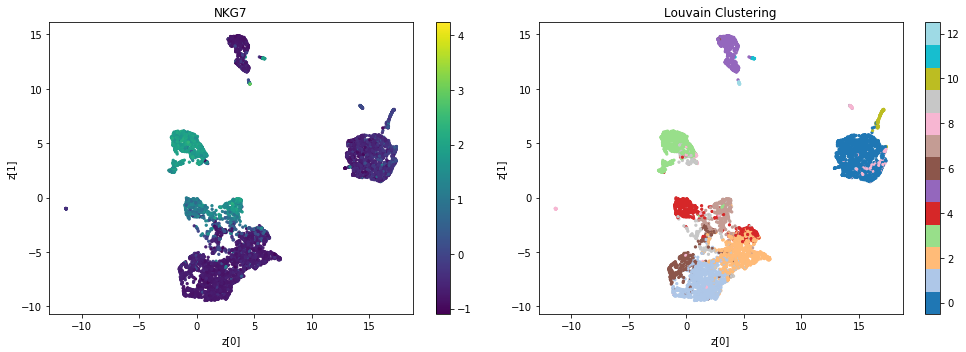

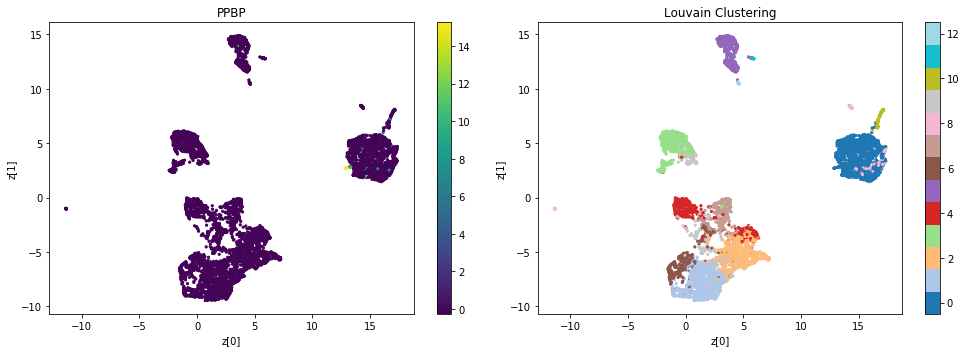

In [21]:
GENE_LIST = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

## Unsupervised Adversarial Autoencoder: Setting Clusters

### Build the model

In [4]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'num_clusters': 20,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'layers_dis_dim': [200, 100, 50, 30],
    'layers_dis_cat_dim': [200, 100, 50, 30],
    'batch_size': 35,
    'epochs': 200,
    'tau': 0.05 # temperature parameter
}

In [5]:
model = AAE5(**parameters)

In [5]:
model = AAE6(**parameters)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Gene expression data rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value  \
batch_size                       35   
epochs                          200   
alpha                           0.1   
do_rate                         0.1   
kernel_initializer   glorot_uniform   
bias_initializer              zeros   
l2_weight                      0.01   
l1_weight                      0.01   
latent_dim                       10   
layer_1_enc_dim                 200   
layer_2_enc_dim                 100   
layer_3_enc_dim                  50   
layer_4_enc_dim                  30   
layer_1_dec_dim                  30   
layer_2_dec_dim                  50   
layer_3_dec_dim                 100   
layer_4_dec_dim                 200   
lr_ae                        0.0002   
dr_ae                         1e-06   
layer_1_dis_dim                 200   
layer_2_dis_dim                 100   
layer_3_dis_dim                  50   
layer_4_dis_dim                  30   
lr_dis                       0.0001   
dr_dis                        1e-06   
lr_gen                       0.0001   
dr_gen                        1e-06   
layer_1_dis_cat_dim           200.0   
layer_2_dis_cat_dim           100.0   
layer_3_dis_cat_dim            50.0   
layer_4_dis_cat_dim            30.0   
lr_dis_cat                   0.0001   
dr_dis_cat                    1e-06   
tau                            0.05   
num_clusters                   20.0   

                                                       Description  
batch_size                                              batch size  
epochs                                            number of epochs  
alpha                          alpha coeff. in activation function  
do_rate                                               dropout rate  
kernel_initializer          kernel initializer of all dense layers  
bias_initializer              bias initializer of all dense layers  
l2_weight                       weight of l2 kernel regularization  
l1_weight                     weight of l1 activity regularization  
latent_dim                             dimension of latent space Z  
layer_1_enc_dim                 dimension of encoder dense layer 1  
layer_2_enc_dim                 dimension of encoder dense layer 2  
layer_3_enc_dim                 dimension of encoder dense layer 3  
layer_4_enc_dim                 dimension of encoder dense layer 4  
layer_1_dec_dim                 dimension of decoder dense layer 1  
layer_2_dec_dim                 dimension of decoder dense layer 2  
layer_3_dec_dim                 dimension of decoder dense layer 3  
layer_4_dec_dim                 dimension of decoder dense layer 4  
lr_ae                                 learning rate of autoencoder  
dr_ae                                    decay rate of autoencoder  
layer_1_dis_dim           dimension of discriminator dense layer 1  
layer_2_dis_dim           dimension of discriminator dense layer 2  
layer_3_dis_dim           dimension of discriminator dense layer 3  
layer_4_dis_dim           dimension of discriminator dense layer 4  
lr_dis                              learning rate of discriminator  
dr_dis                                 decay rate of discriminator  
lr_gen                                  learning rate of generator  
dr_gen                                     decay rate of generator  
layer_1_dis_cat_dim  dimension of cat. discriminator dense layer 1  
layer_2_dis_cat_dim  dimension of cat. discriminator dense layer 2  
layer_3_dis_cat_dim  dimension of cat. discriminator dense layer 3  
layer_4_dis_cat_dim  dimension of cat. discriminator dense layer 4  
lr_dis_cat                     learning rate of cat. discriminator  
dr_dis_cat                        decay rate of cat. discriminator  
tau                                          temperature parameter  
num_clusters                     number of clusters in the dateset

In [9]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          357800      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
____________________________________________________________________________________________

Total params: 388,789
Trainable params: 388,029
Non-trainable params: 760
__________________________________________________________________________________________________

Autoencoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 10), (None,  387060      X[0][0]                          
__________________________________________________________________________________________________
decoder (Model)                 (None, 1789)         388789      encoder[2][2]                    
                                                                 encoder[2][3]                    
Total params: 

In [11]:
# Export model graphs

os.makedirs('../graphs/AAE5/PBMC10k', exist_ok=True)
model.export_graph('../graphs/AAE5/PBMC10k')

Model graphs saved.



### Visualize graphs


ENCODER


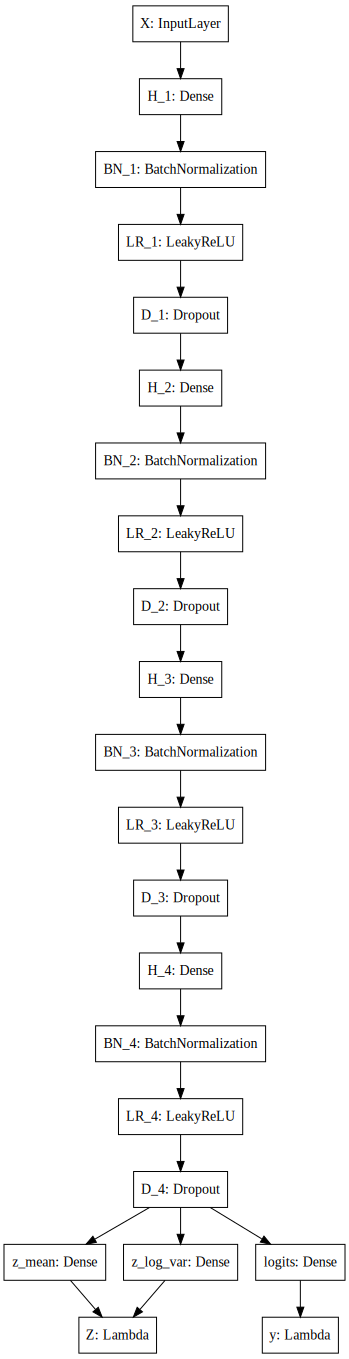

In [12]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


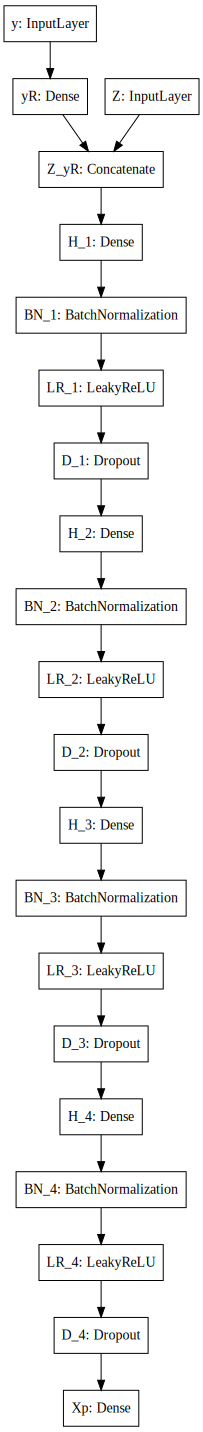

In [13]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


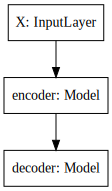

In [14]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


DISCRIMINATOR


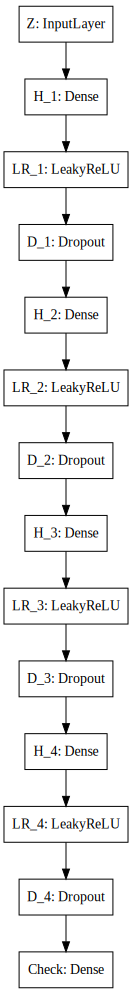

In [15]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))


CATEGORICAL DISCRIMINATOR


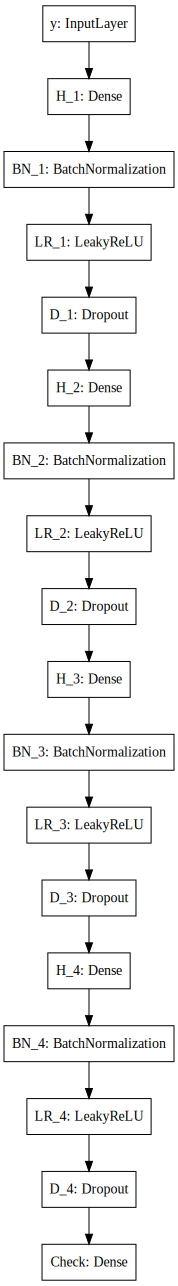

In [16]:
print("\nCATEGORICAL DISCRIMINATOR")
print("=========================")
SVG(model_to_dot(model.discriminator_cat).create(prog='dot', format='svg'))

### Train the model


Epoch 200/200, reconstruction loss: 1.060151, generation loss: 1.676571, discriminator loss: 0.683360, cat. discriminator loss: 0.330173


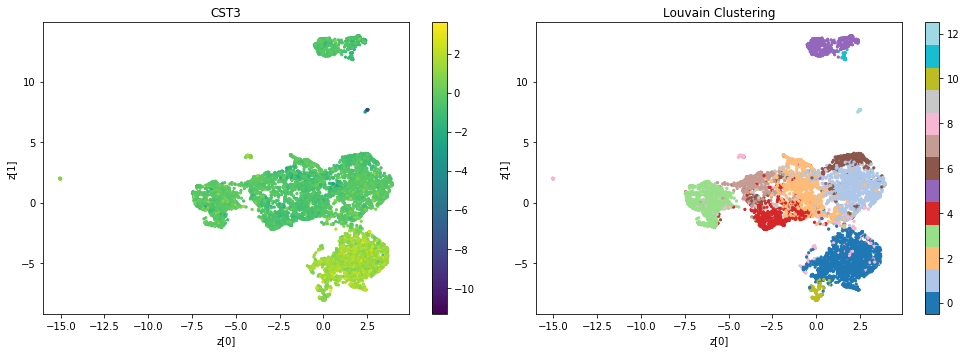

Training completed.


In [12]:
# graph=True to show the data points in the 2-D latent space

GENE = 'CST3' # used only for training visualization 

rec_loss, val_loss, dis_loss, dis_cat_loss = model.train(graph=True, gene=GENE)

In [13]:
# save models in h5 format
os.makedirs('../models/AAE5/PBMC10k', exist_ok=True)
model.export_model('../models/AAE5/PBMC10k')

All networks exported in h5 format.


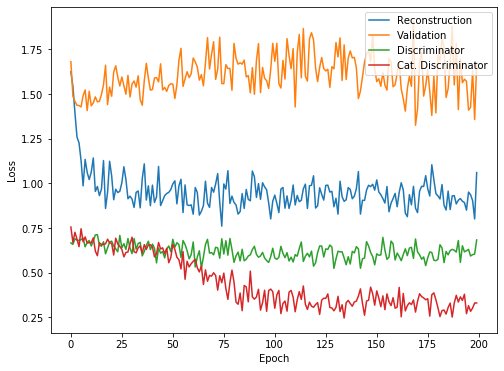

In [14]:
# Plot training loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss)
plt.plot(val_loss)
plt.plot(dis_loss)
plt.plot(dis_cat_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Reconstruction', 'Validation', 'Discriminator', 'Cat. Discriminator'], 
           loc='upper right')
plt.show()

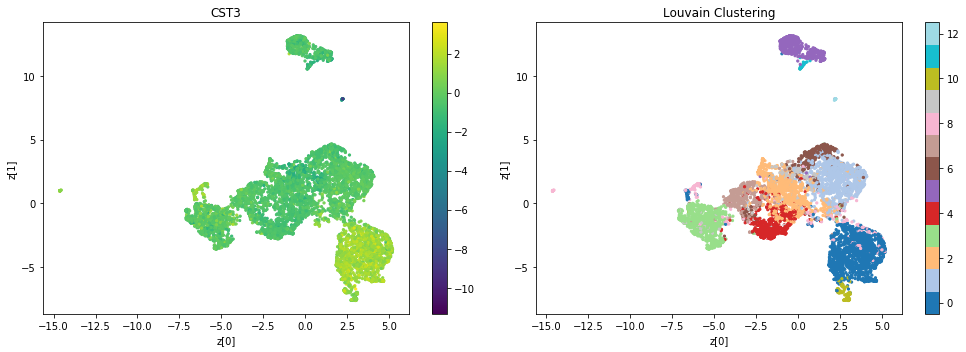

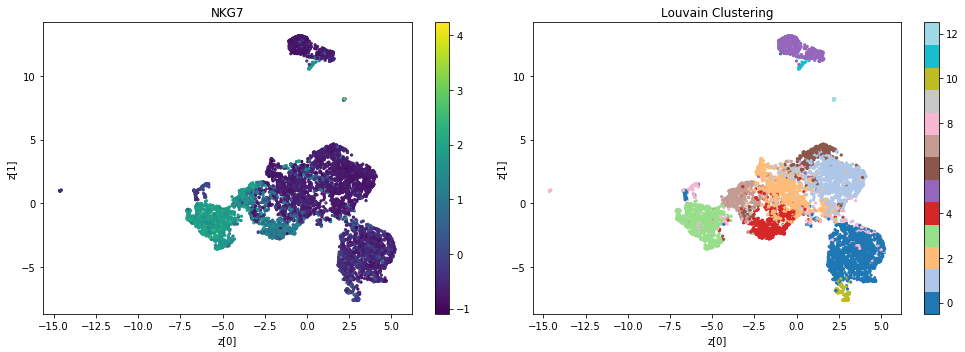

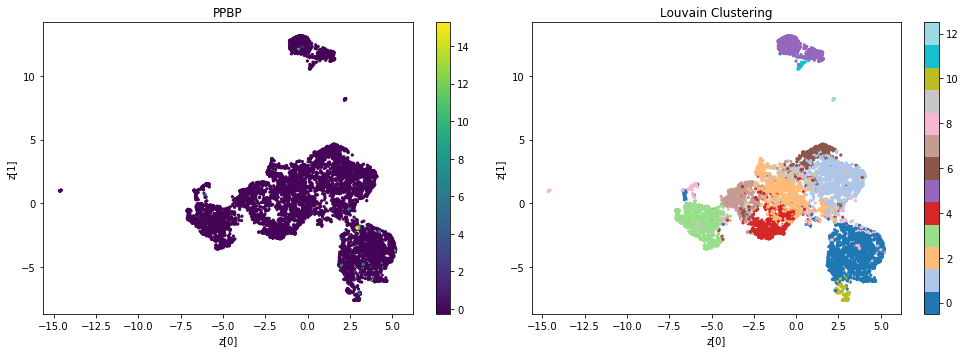

In [15]:
GENE_LIST = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

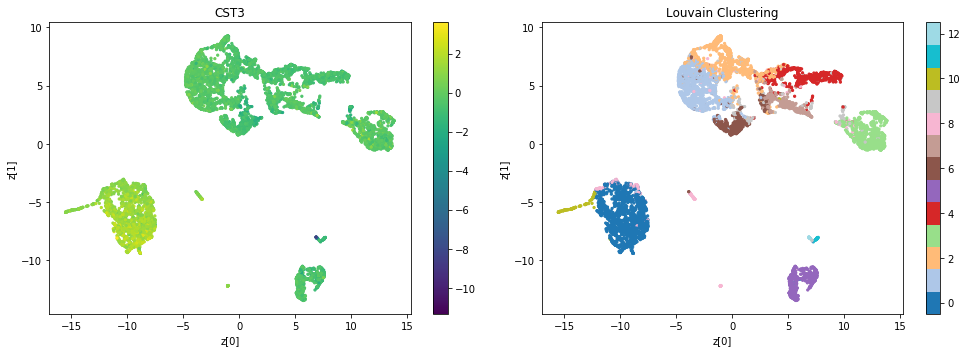

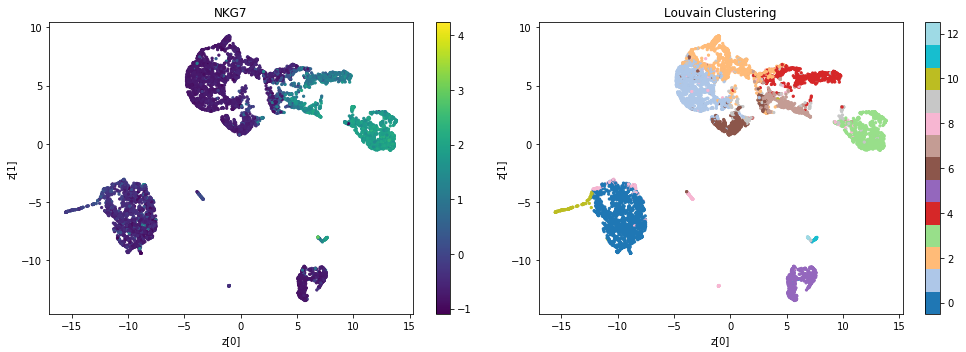

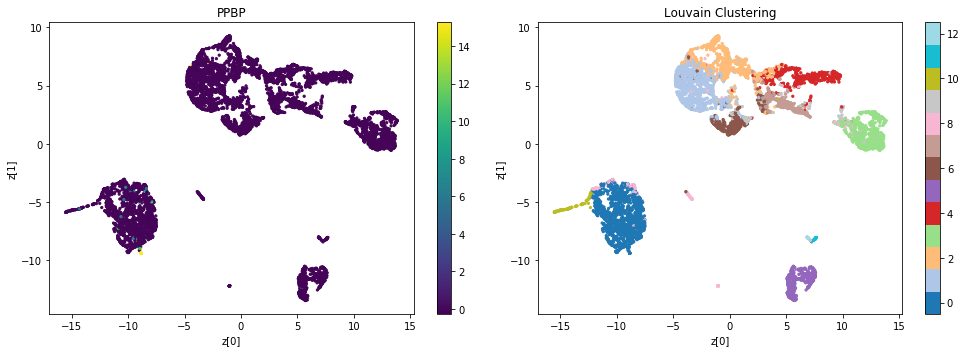

In [23]:
# model AAE5

## Variational Autoencoder

<img src="img/variational_autoencoder_model.png" width="800px" style="float:center">

### Build the model

In [4]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'batch_size': 35,
    'epochs': 500 
}

In [5]:
model = VAE(**parameters)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Dataset rescaled.


In [9]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value                             Description
batch_size                      35                              batch size
epochs                          50                        number of epochs
alpha                          0.1     alpha coeff. in activation function
do_rate                        0.1                            dropout rate
kernel_initializer  glorot_uniform  kernel initializer of all dense layers
bias_initializer             zeros    bias initializer of all dense layers
l2_weight                     None      weight of l2 kernel regularization
l1_weight                     None    weight of l1 activity regularization
latent_dim                      10             dimension of latent space Z
layer_1_enc_dim                200      dimension of encoder dense layer 1
layer_2_enc_dim                100      dimension of encoder dense layer 2
layer_3_enc_dim                 50      dimension of encoder dense layer 3
layer_4_enc_dim                 30      dimension of encoder dense layer 4
layer_1_dec_dim                 30      dimension of decoder dense layer 1
layer_2_dec_dim                 50      dimension of decoder dense layer 2
layer_3_dec_dim                100      dimension of decoder dense layer 3
layer_4_dec_dim                200      dimension of decoder dense layer 4
lr_ae                       0.0002            learning rate of autoencoder
dr_ae                        1e-06               decay rate of autoencoder

In [8]:
# Build the full model

model.build_model()

In [11]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          358000      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
____________________________________________________________________________________________

In [12]:
# Export model graphs

log_dir = '../results/VAE/PBMC10k/'
os.makedirs('../results/VAE/PBMC10k/graphs', exist_ok=True)
model.export_graph('../results/VAE/PBMC10k/graphs')

Model graphs saved.



### Visualize graphs


ENCODER


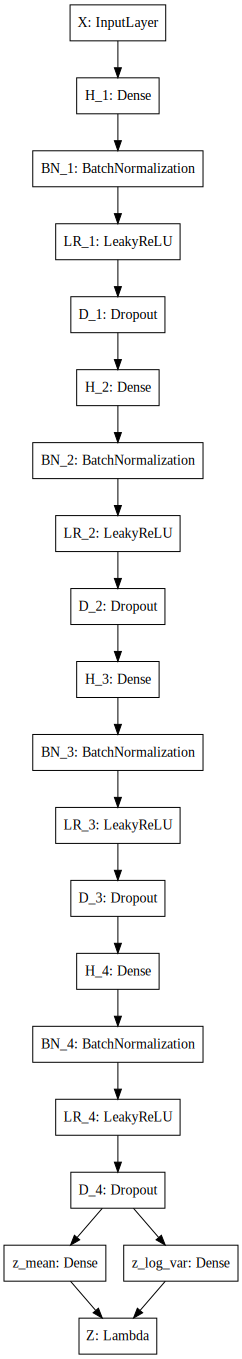

In [14]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


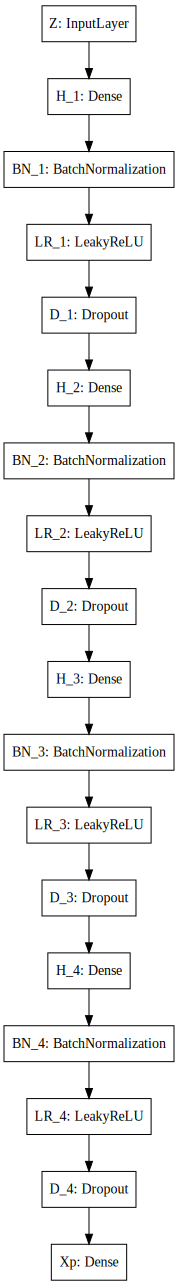

In [15]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


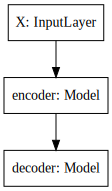

In [16]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))

### Train the model

In [ ]:
model.encoder.get_weights()

In [ ]:
model.autoencoder.get_layer('encoder').get_weights()

In [9]:
# Training...

log_dir = '../results/VAE/PBMC10k/'
os.makedirs(log_dir, exist_ok=True)

loss, val_loss = model.train(val_split=0.2, log_dir=log_dir)

Start model training...
Train on 6000 samples, validate on 1500 samples
Epoch 1/500
6000/6000 [==============================] - 4s 733us/step - loss: 1983.3612 - val_loss: 1934.5396
Epoch 2/500
6000/6000 [==============================] - 2s 407us/step - loss: 1816.8491 - val_loss: 1848.3868
Epoch 3/500
6000/6000 [==============================] - 2s 405us/step - loss: 1776.9951 - val_loss: 1797.2132
Epoch 4/500
6000/6000 [==============================] - 2s 392us/step - loss: 1750.4474 - val_loss: 1778.0110
Epoch 5/500
6000/6000 [==============================] - 2s 337us/step - loss: 1734.0000 - val_loss: 1766.9102
Epoch 6/500
6000/6000 [==============================] - 2s 343us/step - loss: 1724.9420 - val_loss: 1761.8355
Epoch 7/500
6000/6000 [==============================] - 2s 346us/step - loss: 1721.4077 - val_loss: 1757.4416
Epoch 8/500
6000/6000 [==============================] - 2s 362us/step - loss: 1713.0978 - val_loss: 1741.0126
Epoch 9/500
6000/6000 [=================

6000/6000 [==============================] - 2s 376us/step - loss: 1671.3487 - val_loss: 1709.1174
Epoch 74/500
6000/6000 [==============================] - 2s 376us/step - loss: 1670.4148 - val_loss: 1708.6067
Epoch 75/500
6000/6000 [==============================] - 2s 405us/step - loss: 1670.8846 - val_loss: 1708.7522
Epoch 76/500
6000/6000 [==============================] - 2s 399us/step - loss: 1670.5183 - val_loss: 1708.5532
Epoch 77/500
6000/6000 [==============================] - 2s 400us/step - loss: 1669.8897 - val_loss: 1708.2201
Epoch 78/500
6000/6000 [==============================] - 2s 408us/step - loss: 1669.6281 - val_loss: 1708.2781
Epoch 79/500
6000/6000 [==============================] - 2s 408us/step - loss: 1669.9470 - val_loss: 1707.9703
Epoch 80/500
6000/6000 [==============================] - 2s 401us/step - loss: 1669.7532 - val_loss: 1707.7998
Epoch 81/500
6000/6000 [==============================] - 2s 405us/step - loss: 1669.6299 - val_loss: 1707.4110
Epoch

Epoch 146/500
6000/6000 [==============================] - 2s 372us/step - loss: 1661.1770 - val_loss: 1702.5733
Epoch 147/500
6000/6000 [==============================] - 2s 373us/step - loss: 1661.6718 - val_loss: 1702.8890
Epoch 148/500
6000/6000 [==============================] - 2s 393us/step - loss: 1661.5795 - val_loss: 1702.6803
Epoch 149/500
6000/6000 [==============================] - 3s 420us/step - loss: 1661.5944 - val_loss: 1702.7556
Epoch 150/500
6000/6000 [==============================] - 2s 378us/step - loss: 1661.5538 - val_loss: 1702.5524
Epoch 151/500
6000/6000 [==============================] - 2s 379us/step - loss: 1661.1319 - val_loss: 1702.6126
Epoch 152/500
6000/6000 [==============================] - 2s 382us/step - loss: 1661.2769 - val_loss: 1702.3824
Epoch 153/500
6000/6000 [==============================] - 2s 385us/step - loss: 1660.8986 - val_loss: 1702.6034
Epoch 154/500
6000/6000 [==============================] - 2s 375us/step - loss: 1661.3377 - val

6000/6000 [==============================] - 2s 383us/step - loss: 1657.8545 - val_loss: 1701.3887
Epoch 219/500
6000/6000 [==============================] - 2s 397us/step - loss: 1657.8115 - val_loss: 1701.1794
Epoch 220/500
6000/6000 [==============================] - 2s 397us/step - loss: 1657.7007 - val_loss: 1701.2901
Epoch 221/500
6000/6000 [==============================] - 3s 430us/step - loss: 1658.0635 - val_loss: 1701.2248
Epoch 222/500
6000/6000 [==============================] - 3s 418us/step - loss: 1657.5866 - val_loss: 1701.2760
Epoch 223/500
6000/6000 [==============================] - 3s 418us/step - loss: 1657.5862 - val_loss: 1701.2621
Epoch 224/500
6000/6000 [==============================] - 2s 415us/step - loss: 1657.5340 - val_loss: 1701.1307
Epoch 225/500
6000/6000 [==============================] - 2s 398us/step - loss: 1657.5655 - val_loss: 1701.3660
Epoch 226/500
6000/6000 [==============================] - 2s 391us/step - loss: 1657.6678 - val_loss: 1701.20

6000/6000 [==============================] - 2s 400us/step - loss: 1655.6205 - val_loss: 1701.1953
Epoch 291/500
6000/6000 [==============================] - 2s 400us/step - loss: 1655.6100 - val_loss: 1700.8958
Epoch 292/500
6000/6000 [==============================] - 2s 396us/step - loss: 1655.6182 - val_loss: 1701.0520
Epoch 293/500
6000/6000 [==============================] - 2s 379us/step - loss: 1656.2686 - val_loss: 1700.9410
Epoch 294/500
6000/6000 [==============================] - 2s 416us/step - loss: 1655.3260 - val_loss: 1701.7533
Epoch 295/500
6000/6000 [==============================] - 2s 415us/step - loss: 1655.0036 - val_loss: 1701.4483
Epoch 296/500
6000/6000 [==============================] - 2s 400us/step - loss: 1655.3319 - val_loss: 1701.3128
Epoch 297/500
6000/6000 [==============================] - 3s 423us/step - loss: 1655.1972 - val_loss: 1701.0127
Epoch 298/500
6000/6000 [==============================] - 2s 389us/step - loss: 1655.8307 - val_loss: 1701.05

In [ ]:
!tensorboard --logdir=../results/VAE/PBMC10k/

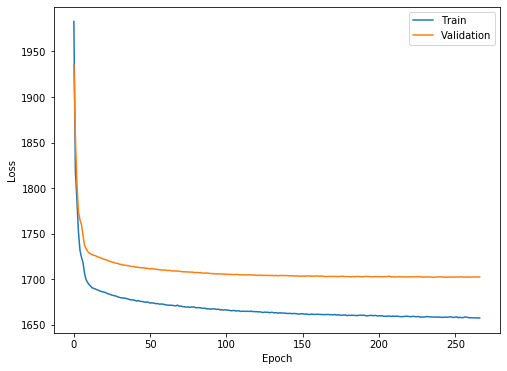

In [14]:
# Plot training & validation loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

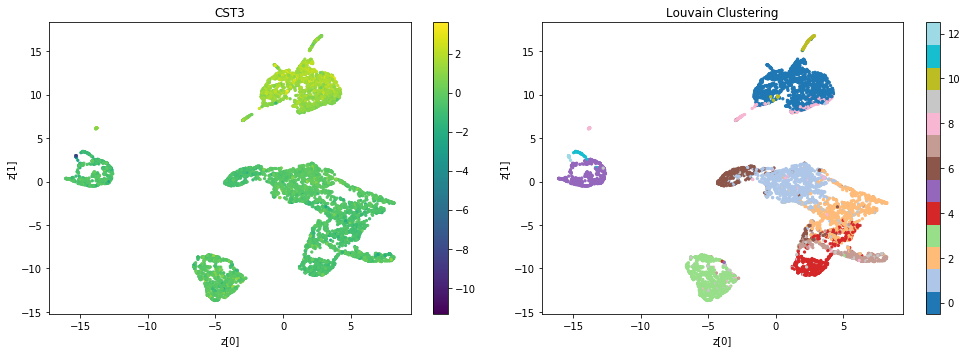

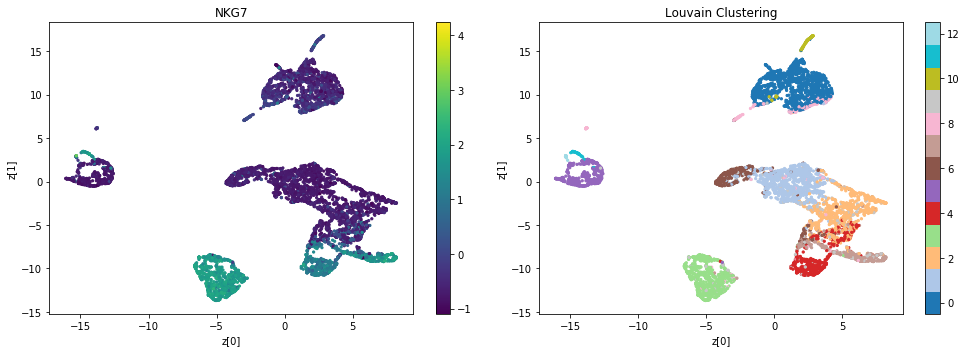

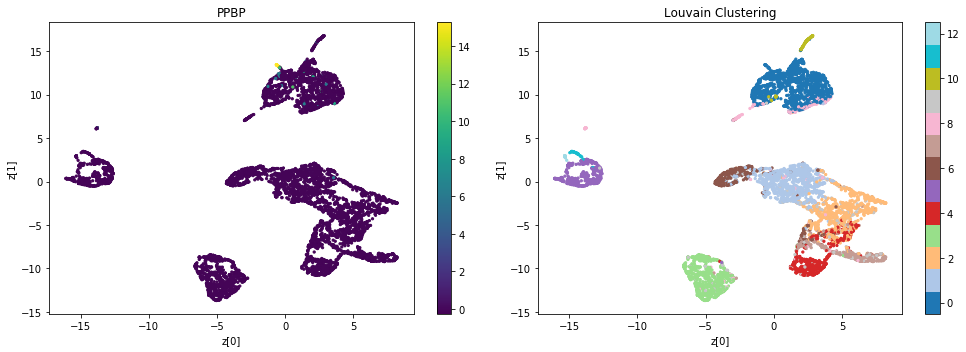

In [16]:
gene_list = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=gene_list, louvain=True)

# Clustering analysis on 8k PBMC data

In [1]:
from keras.utils.vis_utils import model_to_dot
from keras.utils import normalize, to_categorical
from IPython.display import SVG

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os

from imp import load_source
from utils import plot_results_pca, plot_results_umap, plot_results_louvain
from models import *

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

## Adversarial Autoencoder: Basic Architecture

<img src="img/adversarial_autoencoder_model.png" width="800px" style="float:center" >

### Build the model

In [4]:
# Network parameters

layers_enc_dim = [100,50,50]
layers_dec_dim = [50,50,100]
layers_dis_dim = [50,50,100]
batch_size = 35
latent_dim = 50
epochs = 50

In [5]:
model = AAE1(latent_dim=latent_dim,
             layers_enc_dim=layers_enc_dim, 
             layers_dec_dim=layers_dec_dim, 
             layers_dis_dim=layers_dis_dim,
             batch_size=batch_size,
             epochs=epochs)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc8k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Gene expression data rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value                               Description
latent_dim                      50               dimension of latent space Z
layer_1_enc_dim                100        dimension of encoder dense layer 1
layer_2_enc_dim                 50        dimension of encoder dense layer 2
layer_3_enc_dim                 50        dimension of encoder dense layer 3
layer_1_dec_dim                 50        dimension of decoder dense layer 1
layer_2_dec_dim                 50        dimension of decoder dense layer 2
layer_3_dec_dim                100        dimension of decoder dense layer 3
layer_1_dis_dim                 50  dimension of discriminator dense layer 1
layer_2_dis_dim                 50  dimension of discriminator dense layer 2
layer_3_dis_dim                100  dimension of discriminator dense layer 3
alpha                          0.1       alpha coeff. in activation function
do_rate                        0.1                              dropout rate
kernel_initializer  glorot_uniform    kernel initializer of all dense layers
bias_initializer             zeros      bias initializer of all dense layers
l2_weight                     0.01        weight of l2 kernel regularization
l2_weight                     0.01      weight of l1 activity regularization
batch_size                      35                                batch size
epochs                          50                          number of epochs
lr_dis                      0.0001               learning rate discriminator
lr_gen                      0.0001                   learning rate generator
lr_ae                       0.0002                 learning rate autoencoder
dr_dis                       1e-06                  decay rate discriminator
dr_gen                       1e-06                      decay rate generator
dr_ae                        1e-06                    decay rate autoencoder

In [9]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1330)         0                                            
__________________________________________________________________________________________________
D_O (Dropout)                   (None, 1330)         0           X[0][0]                          
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 100)          133000      D_O[0][0]                        
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 100)          400         H_1[0][0]                        
____________________________________________________________________________________________

In [13]:
# Export model graphs

os.makedirs('../graphs/AAE1/PBMC8k', exist_ok=True)
model.export_graph('../graphs/AAE1/PBMC8k')

Model graphs saved.



### Visualize graphs


ENCODER


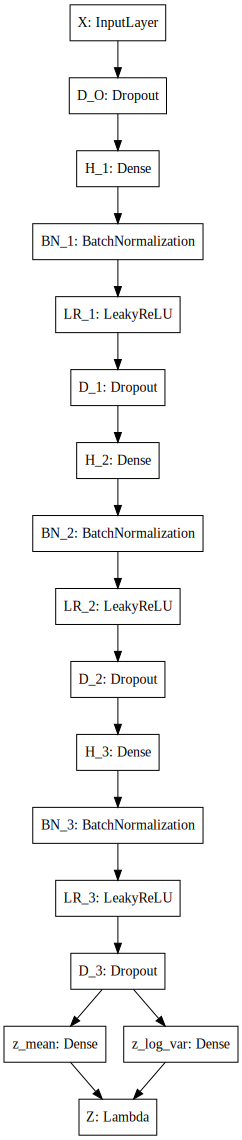

In [16]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


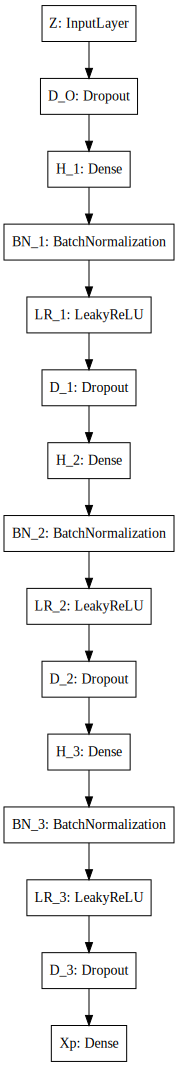

In [17]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


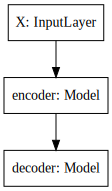

In [18]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


GENERATOR


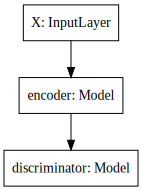

In [23]:
print("\nGENERATOR")
print("=========")
SVG(model_to_dot(model.generator).create(prog='dot', format='svg'))


DISCRIMINATOR


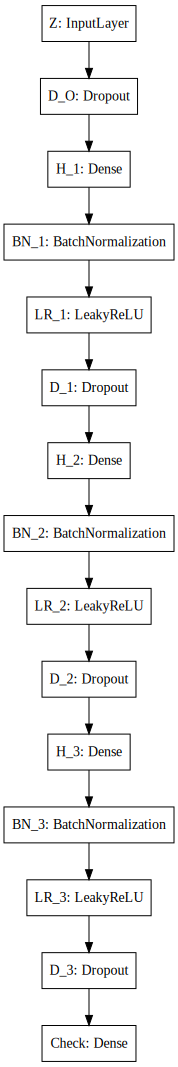

In [19]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))

### Train the model

Epoch 50/50, reconstruction loss: 1.037190, generation loss: 0.409361, discriminator loss: 0.307326


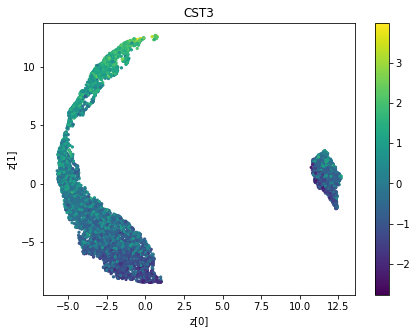

Training completed.


In [11]:
# graph=True to show the data points in the 2-D latent space

gene = 'CST3' # used only for training visualization 

rec_loss, gen_loss, dis_loss = model.train(graph=True, gene=gene)

In [16]:
# save models in h5 format
os.makedirs('../models/AAE1/PBMC8k', exist_ok=True)
model.export_model('../models/AAE1/PBMC8k')

Adversarial Autoencoder networks exported in h5 format.


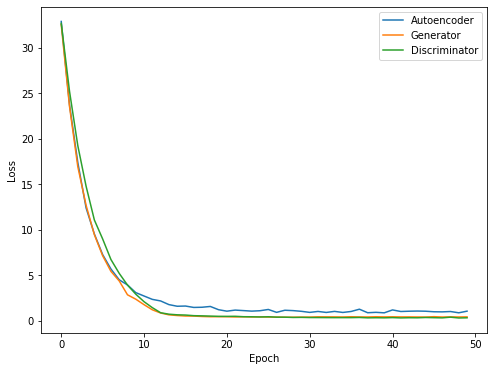

In [12]:
# Plot training & validation loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss)
plt.plot(gen_loss)
plt.plot(dis_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Generator', 'Discriminator'], loc='upper right')
plt.show()

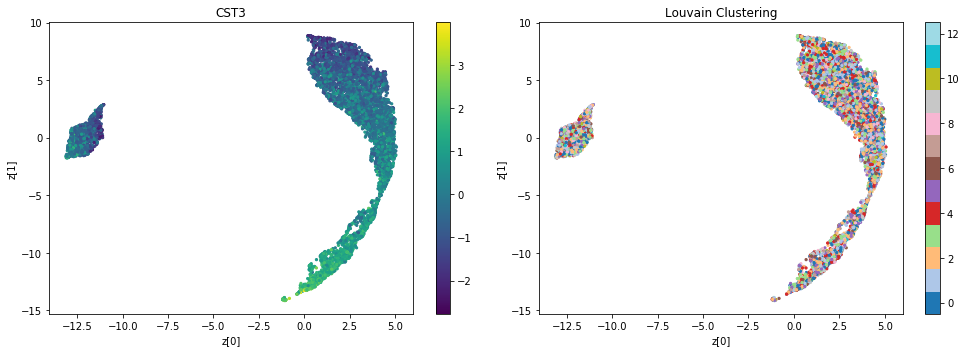

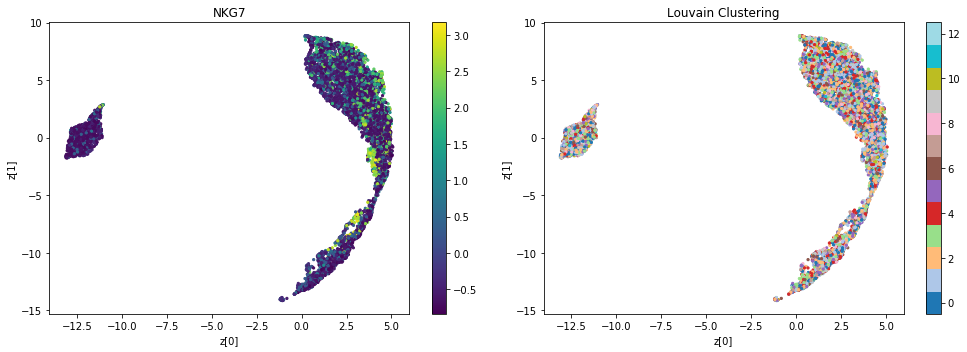

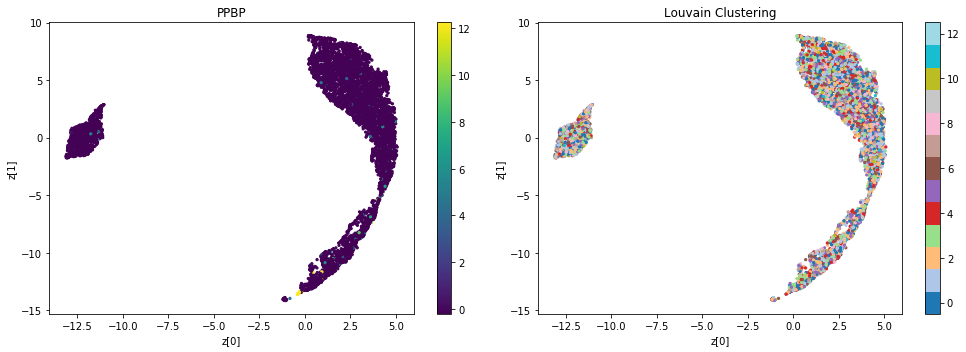

In [13]:
gene_list = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=gene_list, louvain=True)

## Incorporating Label Information in the Adversarial Regularization

### Build the model

In [4]:
# Network parameters

layers_enc_dim = [100,50,50]
layers_dec_dim = [50,50,100]
layers_dis_dim = [50,50,100]
batch_size = 35
latent_dim = 50
epochs = 50

In [5]:
model = AAE2(latent_dim=latent_dim,
             layers_enc_dim=layers_enc_dim, 
             layers_dec_dim=layers_dec_dim, 
             layers_dis_dim=layers_dis_dim,
             batch_size=batch_size,
             epochs=epochs)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc8k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Gene expression data rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value                               Description
latent_dim                      50               dimension of latent space Z
layer_1_enc_dim                100        dimension of encoder dense layer 1
layer_2_enc_dim                 50        dimension of encoder dense layer 2
layer_3_enc_dim                 50        dimension of encoder dense layer 3
layer_1_dec_dim                 50        dimension of decoder dense layer 1
layer_2_dec_dim                 50        dimension of decoder dense layer 2
layer_3_dec_dim                100        dimension of decoder dense layer 3
layer_1_dis_dim                 50  dimension of discriminator dense layer 1
layer_2_dis_dim                 50  dimension of discriminator dense layer 2
layer_3_dis_dim                100  dimension of discriminator dense layer 3
alpha                          0.1       alpha coeff. in activation function
do_rate                        0.1                              dropout rate
kernel_initializer  glorot_uniform    kernel initializer of all dense layers
bias_initializer             zeros      bias initializer of all dense layers
l2_weight                     0.01        weight of l2 kernel regularization
l2_weight                     0.01      weight of l1 activity regularization
batch_size                      35                                batch size
epochs                          50                          number of epochs
lr_dis                      0.0001               learning rate discriminator
lr_gen                      0.0001                   learning rate generator
lr_ae                       0.0002                 learning rate autoencoder
dr_dis                       1e-06                  decay rate discriminator
dr_gen                       1e-06                      decay rate generator
dr_ae                        1e-06                    decay rate autoencoder

In [9]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1330)         0                                            
__________________________________________________________________________________________________
D_O (Dropout)                   (None, 1330)         0           X[0][0]                          
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 100)          133000      D_O[0][0]                        
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 100)          400         H_1[0][0]                        
____________________________________________________________________________________________

In [11]:
# Export model graphs

os.makedirs('../graphs/AAE2/PBMC8k', exist_ok=True)
model.export_graph('../graphs/AAE2/PBMC8k')

Model graphs saved.



### Visualize graphs


ENCODER


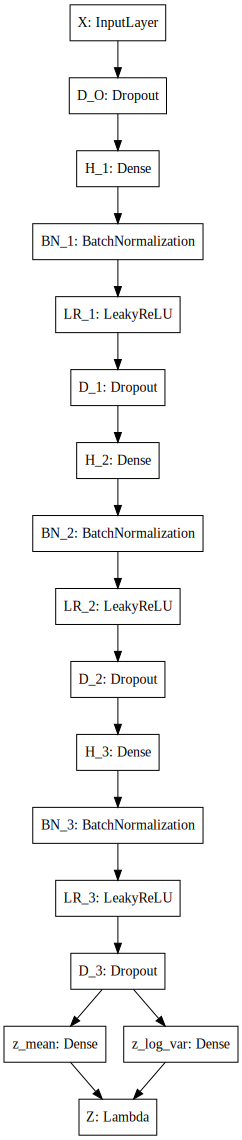

In [11]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


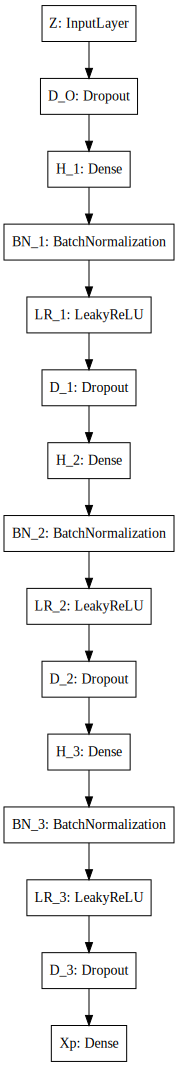

In [12]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


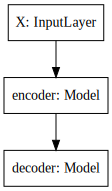

In [13]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


GENERATOR


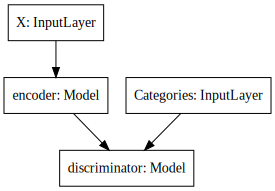

In [14]:
print("\nGENERATOR")
print("=========")
SVG(model_to_dot(model.generator).create(prog='dot', format='svg'))


DISCRIMINATOR


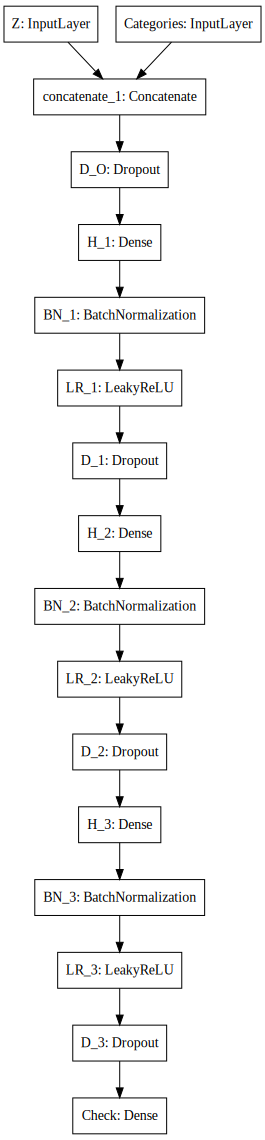

In [15]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))

### Train the model

Epoch 50/50, reconstruction loss: 1.010608, generation loss: 0.410127, discriminator loss: 0.271828


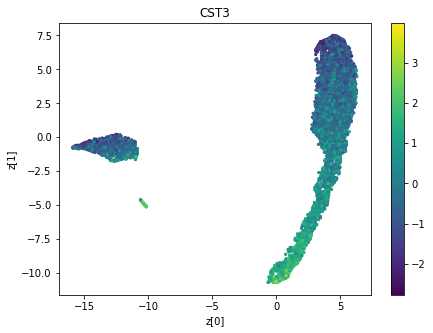

Training completed.


In [16]:
# graph=True to show the data points in the 2-D latent space

gene = 'CST3' # used only for training visualization 

rec_loss, gen_loss, dis_loss = model.train(graph=True, gene=gene)

In [18]:
# save models in h5 format
os.makedirs('../models/AAE2/PBMC8k', exist_ok=True)
model.export_model('../models/AAE2/PBMC8k')

All networks exported in h5 format.


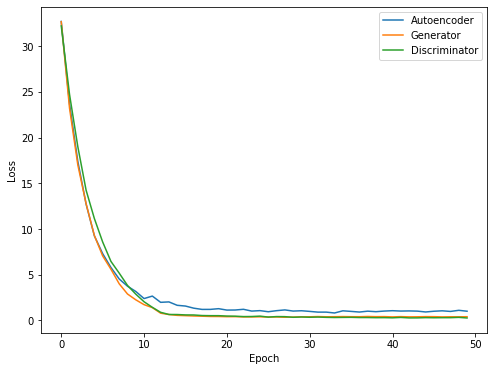

In [17]:
# Plot training & validation loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss)
plt.plot(gen_loss)
plt.plot(dis_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Generator', 'Discriminator'], loc='upper right')
plt.show()

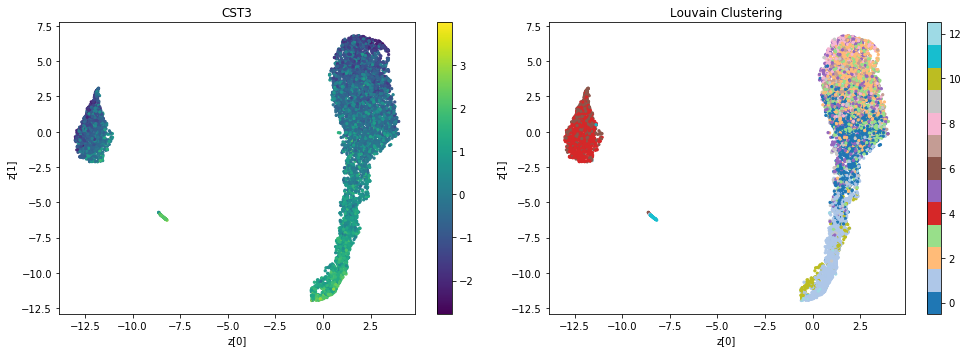

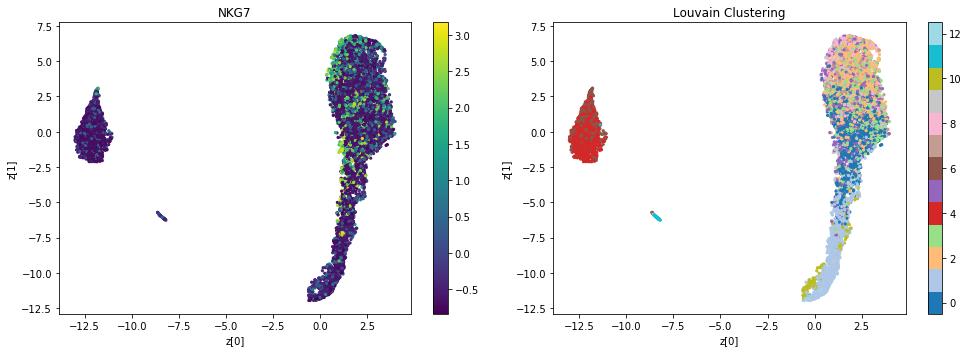

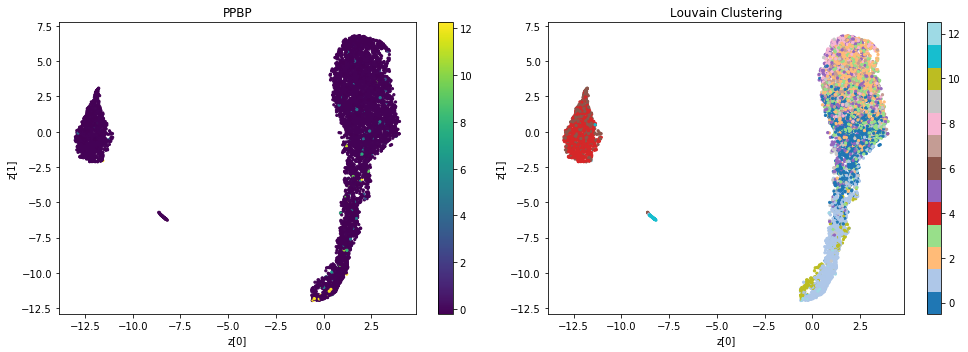

In [18]:
gene_list = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=gene_list, louvain=True)

# Clustering analysis on 3k PBMC data


In [1]:
from keras.utils.vis_utils import model_to_dot
from keras.utils import normalize, to_categorical
from IPython.display import SVG

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os

from imp import load_source
from utils import plot_results_pca, plot_results_umap, plot_results_louvain
from models import *

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

## Adversarial Autoencoder: Basic Architecture

<img src="img/adversarial_autoencoder_model.png" width="800px" style="float:center" >

### Build the model

In [4]:
# Network parameters

layers_enc_dim = [100,50,50]
layers_dec_dim = [50,50,100]
layers_dis_dim = [50,50,100]
batch_size = 35
latent_dim = 50
epochs = 50

In [5]:
model = AAE1(latent_dim=latent_dim,
             layers_enc_dim=layers_enc_dim, 
             layers_dec_dim=layers_dec_dim, 
             layers_dis_dim=layers_dis_dim,
             batch_size=batch_size,
             epochs=epochs)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc3k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Gene expression data rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value                               Description
latent_dim                      50               dimension of latent space Z
layer_1_enc_dim                100        dimension of encoder dense layer 1
layer_2_enc_dim                 50        dimension of encoder dense layer 2
layer_3_enc_dim                 50        dimension of encoder dense layer 3
layer_1_dec_dim                 50        dimension of decoder dense layer 1
layer_2_dec_dim                 50        dimension of decoder dense layer 2
layer_3_dec_dim                100        dimension of decoder dense layer 3
layer_1_dis_dim                 50  dimension of discriminator dense layer 1
layer_2_dis_dim                 50  dimension of discriminator dense layer 2
layer_3_dis_dim                100  dimension of discriminator dense layer 3
alpha                          0.1       alpha coeff. in activation function
do_rate                        0.1                              dropout rate
kernel_initializer  glorot_uniform    kernel initializer of all dense layers
bias_initializer             zeros      bias initializer of all dense layers
l2_weight                     0.01        weight of l2 kernel regularization
l2_weight                     0.01      weight of l1 activity regularization
batch_size                      35                                batch size
epochs                          50                          number of epochs
lr_dis                      0.0001               learning rate discriminator
lr_gen                      0.0001                   learning rate generator
lr_ae                       0.0002                 learning rate autoencoder
dr_dis                       1e-06                  decay rate discriminator
dr_gen                       1e-06                      decay rate generator
dr_ae                        1e-06                    decay rate autoencoder

In [9]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1838)         0                                            
__________________________________________________________________________________________________
D_O (Dropout)                   (None, 1838)         0           X[0][0]                          
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 100)          183800      D_O[0][0]                        
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 100)          400         H_1[0][0]                        
____________________________________________________________________________________________

In [13]:
# Export model graphs

os.makedirs('../graphs/AAE1/PBMC3k', exist_ok=True)
model.export_graph('../graphs/AAE1/PBMC3k')

Model graphs saved.



### Visualize graphs


ENCODER


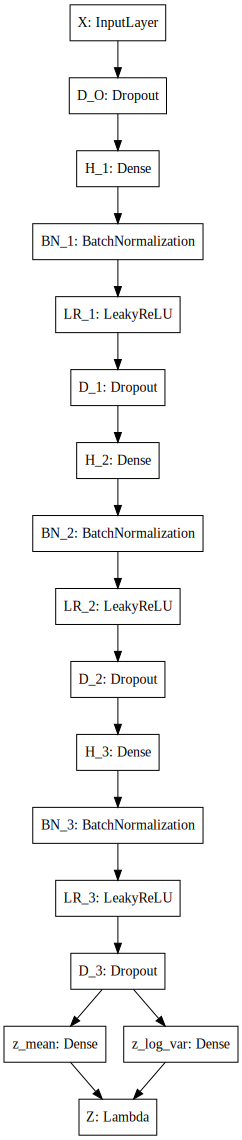

In [16]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


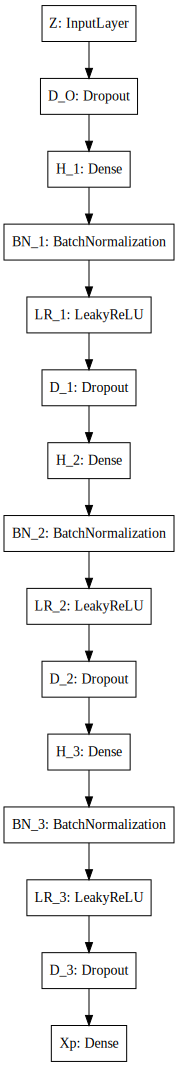

In [17]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


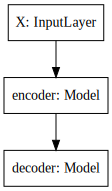

In [18]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


GENERATOR


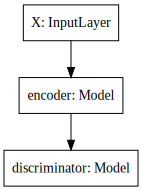

In [23]:
print("\nGENERATOR")
print("=========")
SVG(model_to_dot(model.generator).create(prog='dot', format='svg'))


DISCRIMINATOR


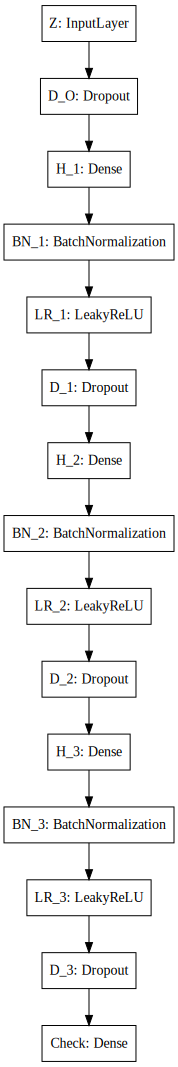

In [19]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))

### Train the model

Epoch 50/50, reconstruction loss: 1.316368, generation loss: 0.451401, discriminator loss: 0.551019


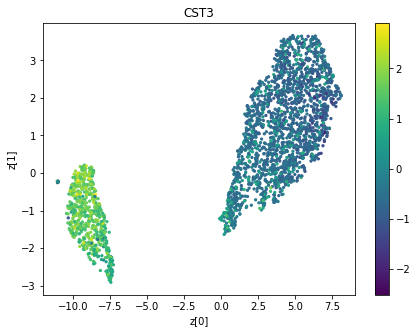

Training completed.


In [11]:
# graph=True to show the data points in the 2-D latent space

gene = 'CST3' # used only for training visualization 

rec_loss, gen_loss, dis_loss = model.train(graph=True, gene=gene)

In [16]:
# save models in h5 format
os.makedirs('../models/AAE1/PBMC3k', exist_ok=True)
model.export_model('../models/AAE1/PBMC3k')

Adversarial Autoencoder networks exported in h5 format.


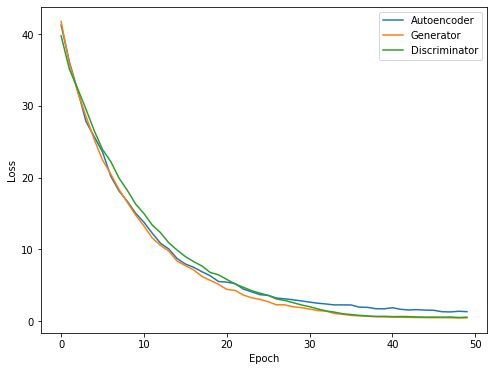

In [12]:
# Plot training & validation loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss)
plt.plot(gen_loss)
plt.plot(dis_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Generator', 'Discriminator'], loc='upper right')
plt.show()

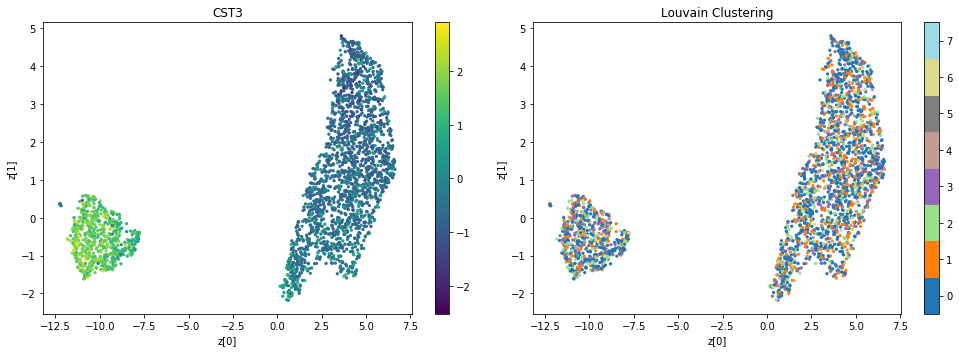

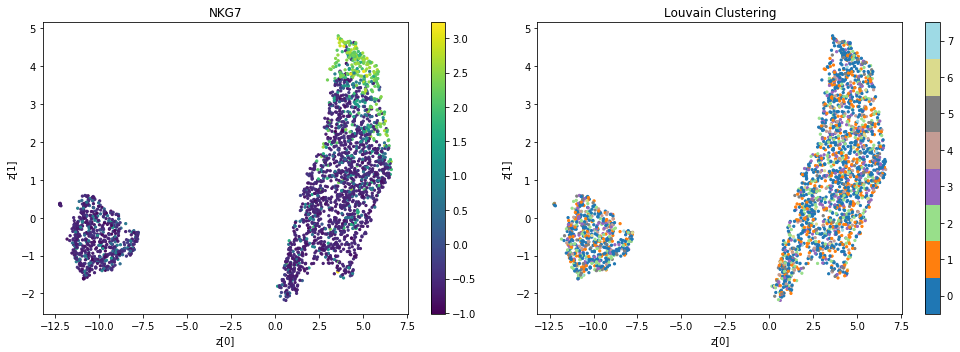

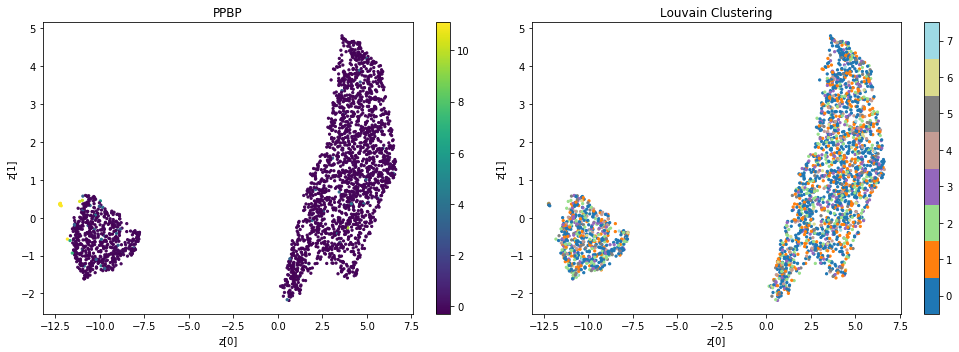

In [13]:
gene_list = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=gene_list, louvain=True)

## Incorporating Label Information in the Adversarial Regularization

### Build the model

In [4]:
# Network parameters

layers_enc_dim = [100,50,50]
layers_dec_dim = [50,50,100]
layers_dis_dim = [50,50,100]
batch_size = 35
latent_dim = 50
epochs = 50

In [5]:
model = AAE2(latent_dim=latent_dim,
             layers_enc_dim=layers_enc_dim, 
             layers_dec_dim=layers_dec_dim, 
             layers_dis_dim=layers_dis_dim,
             batch_size=batch_size,
             epochs=epochs)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc3k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Gene expression data rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


Value                               Description
latent_dim                      50               dimension of latent space Z
layer_1_enc_dim                100        dimension of encoder dense layer 1
layer_2_enc_dim                 50        dimension of encoder dense layer 2
layer_3_enc_dim                 50        dimension of encoder dense layer 3
layer_1_dec_dim                 50        dimension of decoder dense layer 1
layer_2_dec_dim                 50        dimension of decoder dense layer 2
layer_3_dec_dim                100        dimension of decoder dense layer 3
layer_1_dis_dim                 50  dimension of discriminator dense layer 1
layer_2_dis_dim                 50  dimension of discriminator dense layer 2
layer_3_dis_dim                100  dimension of discriminator dense layer 3
alpha                          0.1       alpha coeff. in activation function
do_rate                        0.1                              dropout rate
kernel_initializer  glorot_uniform    kernel initializer of all dense layers
bias_initializer             zeros      bias initializer of all dense layers
l2_weight                     0.01        weight of l2 kernel regularization
l2_weight                     0.01      weight of l1 activity regularization
batch_size                      35                                batch size
epochs                          50                          number of epochs
lr_dis                      0.0001               learning rate discriminator
lr_gen                      0.0001                   learning rate generator
lr_ae                       0.0002                 learning rate autoencoder
dr_dis                       1e-06                  decay rate discriminator
dr_gen                       1e-06                      decay rate generator
dr_ae                        1e-06                    decay rate autoencoder

In [9]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1838)         0                                            
__________________________________________________________________________________________________
D_O (Dropout)                   (None, 1838)         0           X[0][0]                          
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 100)          183800      D_O[0][0]                        
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 100)          400         H_1[0][0]                        
____________________________________________________________________________________________

In [11]:
# Export model graphs

os.makedirs('../graphs/AAE2/PBMC3k', exist_ok=True)
model.export_graph('../graphs/AAE2/PBMC3k')

Model graphs saved.



### Visualize graphs


ENCODER


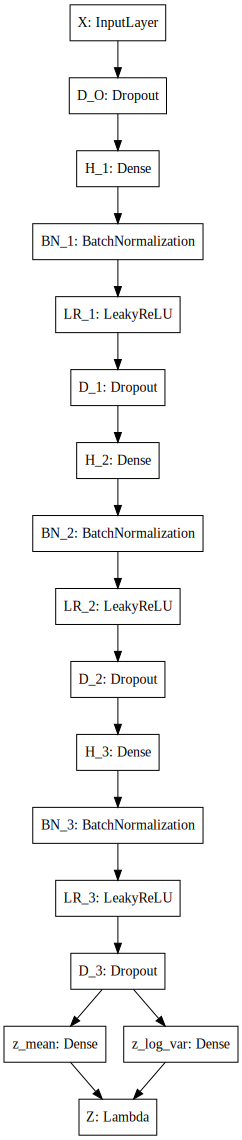

In [11]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


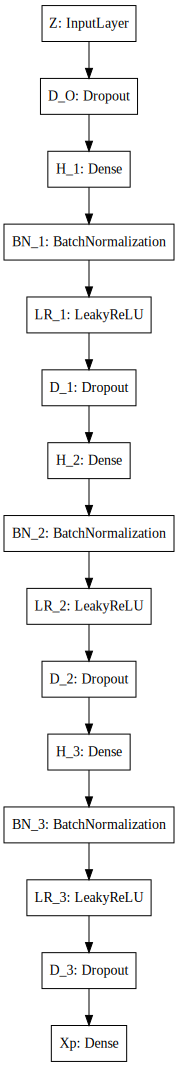

In [12]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


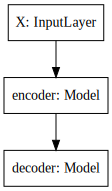

In [13]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


GENERATOR


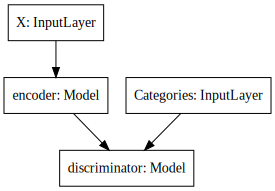

In [14]:
print("\nGENERATOR")
print("=========")
SVG(model_to_dot(model.generator).create(prog='dot', format='svg'))


DISCRIMINATOR


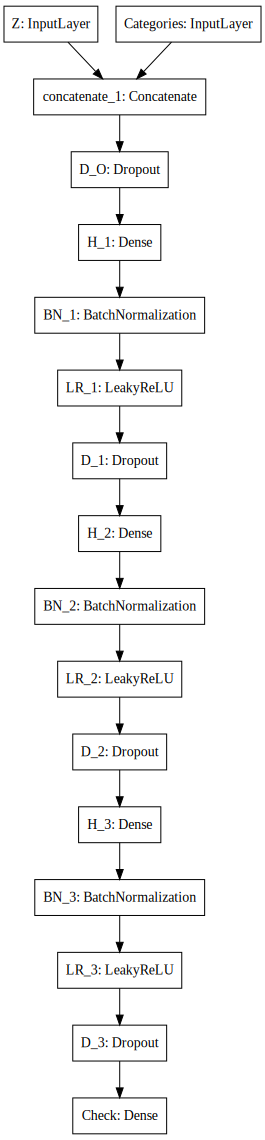

In [15]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))

### Train the model

Epoch 50/50, reconstruction loss: 1.633830, generation loss: 0.489770, discriminator loss: 0.547568


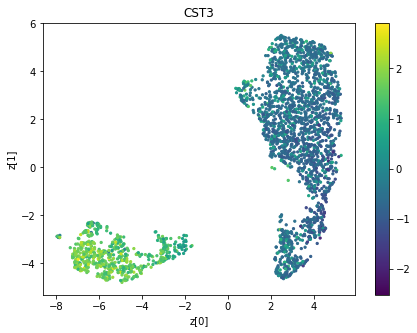

Training completed.


In [11]:
# graph=True to show the data points in the 2-D latent space

gene = 'CST3' # used only for training visualization 

rec_loss, gen_loss, dis_loss = model.train(graph=True, gene=gene)

In [18]:
# save models in h5 format
os.makedirs('../models/AAE2/PBMC3k', exist_ok=True)
model.export_model('../models/AAE2/PBMC3k')

All networks exported in h5 format.


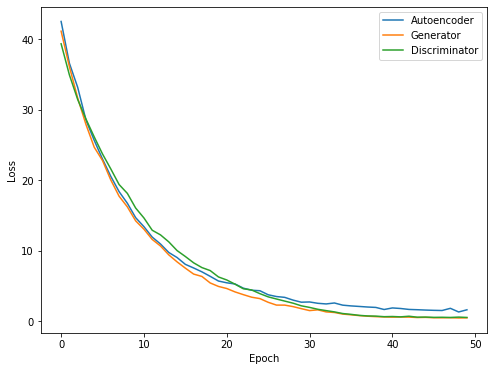

In [12]:
# Plot training & validation loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss)
plt.plot(gen_loss)
plt.plot(dis_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Generator', 'Discriminator'], loc='upper right')
plt.show()

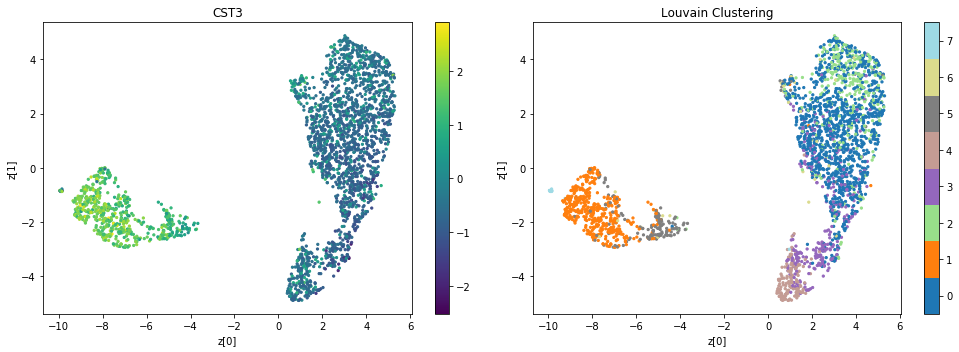

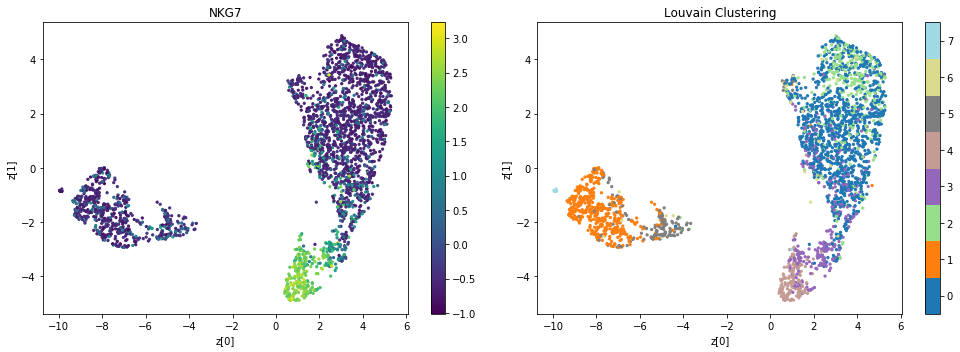

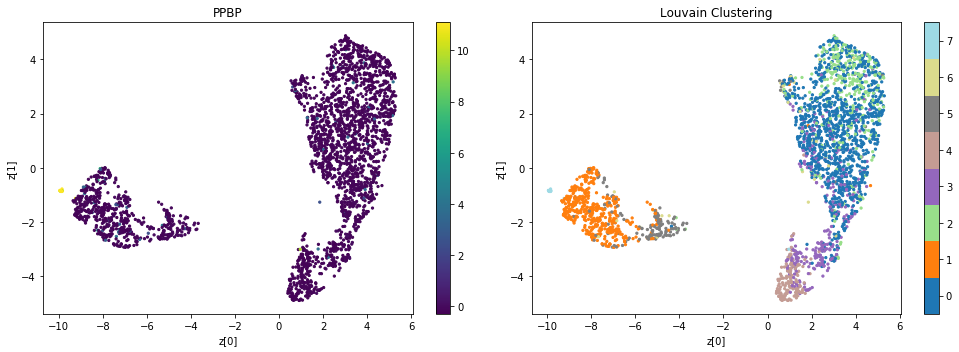

In [13]:
gene_list = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=gene_list, louvain=True)